# Del 3: Pandas - Data Cleaning napredno

Pripravimo datasete:

In [1]:
!tar -xJf data/data_del_03.tar.xz -C ./data/

## Working With Strings In Pandas

Viri:
- [Working with text data](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)
- [Vectorized String Operations](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html)

Pandas has built in many vectorized string methods that can perform these tasks quicker and with less keystrokes.

### Data

<p>We'll work with the 2015 World Happiness Report again <em>and</em> additional economic data from the World Bank. You can find the data set <a target="_blank" href="https://www.kaggle.com/worldbank/world-development-indicators/version/2">here</a>. 
    
   

<p>Below are descriptions for the columns we'll be working with:</p>
<ul>
<li><code>ShortName</code> - Name of the country</li>
<li><code>Region</code> - The region the country belongs to</li>
<li><code>IncomeGroup</code> - The income group the country belongs to, based on Gross National Income (GNI) per capita</li>
<li><code>CurrencyUnit</code> - Name of country's currency</li>
<li><code>SourceOfMostRecentIncomeAndExpenditureData</code> - The name of the survey used to collect the income and expenditure data</li>
<li><code>SpecialNotes</code> - Contains any miscellaneous notes about the data</li>
</ul>

In [ ]:
#vektorizacija: več stvari dela paralelno, ne element po element
#hitreje je kot element po element

In [2]:
import pandas as pd
import numpy as np

In [3]:
# read the data sets into pandas
world_dev = pd.read_csv("data/World_dev.csv")
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [4]:
merged = pd.merge(left=happiness2015, 
                  right=world_dev,
                 how='left',
                 left_on='Country',
                 right_on='ShortName')

col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}

merged.rename(col_renaming, axis=1, inplace=True)

In [6]:
merged.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0


### Using Apply to Transform Strings

In [7]:
merged['CurrencyUnit'].head()

0        Swiss franc
1      Iceland krona
2       Danish krone
3    Norwegian krone
4    Canadian dollar
Name: CurrencyUnit, dtype: object

In [ ]:
#

In [10]:
words = 'Danish krone'

#samo krone bi radi dobili
#split defaultno vzame presledek, če želimo splitati po katerem drugem stolpcu, moramo vpisat kot argument funkcije
words.split()[1]

'krone'

In [15]:
#fnkcija, ki vrne zadnjo besedo stringa
def extract_last_word(element):
    return str(element).split()[-1]

In [18]:
extract_last_word(words)

'krone'

In [16]:
#uporabimo funkcijo na celotnem datarame-u
merged['Apply'] = merged['CurrencyUnit'].apply(extract_last_word)

In [17]:
merged['Apply'].head(4)

0    franc
1    krona
2    krone
3    krone
Name: Apply, dtype: object

### Vectorized String Methods

<img src="./images/Split.png">

In fact, pandas has built in a number of vectorized methods that perform the same operations for strings in series as Python string methods.


<p>Below are some common vectorized string methods, but you can find the full list <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/text.html#method-summary">here</a>:</p>

<table class="tg">
<tbody><tr>
<th>Method</th>
<th>Description</th>
</tr>
<tr>
<td>Series.str.split()</td>
<td>Splits each element in the Series.</td>
</tr>
<tr>
<td>Series.str.strip()</td>
<td>Strips whitespace from each string in the Series.</td>
</tr>
<tr>
<td>Series.str.lower()</td>
<td>Converts strings in the Series to lowercase.</td>
</tr>
<tr>
<td>Series.str.upper()</td>
<td>Converts strings in the Series to uppercase.</td>
</tr>
<tr>
<td>Series.str.get()</td>
<td>Retrieves the ith element of each element in the Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.replace()</span></td>
<td><span style="font-weight:300;font-style:normal">Replaces a regex or string in the Series with another string.</span></td>
</tr>
<tr>
<td>Series.str.cat()</td>
<td>Concatenates strings in a Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.extract()</span></td>
<td><span style="font-weight:300;font-style:normal">Extracts substrings from the Series matching a regex pattern.</span></td>
</tr>
</tbody></table>

We access these vectorized string methods by adding a str between the Series name and method name:

<img src="./images/Syntax.png">

In [19]:
#prvih 5 elementov
merged['CurrencyUnit'].str[:5].head()

0    Swiss
1    Icela
2    Danis
3    Norwe
4    Canad
Name: CurrencyUnit, dtype: object

In [23]:
merged['CurrencyUnit'].str.upper().str.split().head()

0        [SWISS, FRANC]
1      [ICELAND, KRONA]
2       [DANISH, KRONE]
3    [NORWEGIAN, KRONE]
4    [CANADIAN, DOLLAR]
Name: CurrencyUnit, dtype: object

<div class="alert alert-block alert-info">
<b>Vaja: </b> Use the Series.str.split() method to split the CurrencyUnit column into a list of words and then use the Series.str.get() method to select just the last word. Assign the result to merged['Currency Vectorized'].
</div>

In [26]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.upper().str.split().str.get(-1)

In [27]:
merged['Currency Vectorized'].head(4)

0    FRANC
1    KRONA
2    KRONE
3    KRONE
Name: Currency Vectorized, dtype: object

#### Exploring Missing Values with Vectorized String Methods

In [ ]:
#manjkajoče vrednosti pri vektorizirinah string metodah


In [29]:
# v stolpcu je 13 manjkajočih vrednosti
merged['CurrencyUnit'].isnull().sum()

13

In [30]:
def compute_len(element):
    return len(str(element))

In [31]:
lengths_apply = merged['CurrencyUnit'].apply(compute_len)

In [33]:
#za vsako vrstico nam pove, koliko znakov vsebuje
lengths_apply.head()

0    11
1    13
2    12
3    15
4    15
Name: CurrencyUnit, dtype: int64

In [35]:
#value_counts privzeto ne šteje manjkajočih vrednosti
#želimo tudi manjkajoče vrednosti: dropna = False
lengths_apply.value_counts(dropna = False)

#3   13 so manjkajoče vresdnosti: ko smo jih šteli, ne šteje kot manjkajoče vrednsoti, ampak
#šteje kot dtring dolžine 3

14    21
4     20
12    17
13    14
3     13
15    13
16    12
18     9
17     9
11     8
22     7
25     5
19     3
9      2
26     1
20     1
23     1
10     1
39     1
Name: CurrencyUnit, dtype: int64

In [36]:
merged['CurrencyUnit'].str.len().value_counts(dropna=False)
#sedaj imamo nan vrednosti izpisane, ne več kot stringe

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

In [ ]:
#prednost vektoriziranih metod 
#1. ima boljše performance
#2. je bolj berljiva 
#3. izloči manjkajoče vrednosti

## Regular Expressions in Pandas

### The Regular Expression Module


<p></p><center><img alt="basic matches" src="images/basic_match_1.svg"></center><p></p>


In [37]:
import re

In [38]:
#1. argument je regex, 2. argument je string, v katerem iščemo
re.search('and', 'hand')

<re.Match object; span=(1, 4), match='and'>

In [40]:
print(re.search('and', 'antdote'))
#nič ne vrne

None


In [ ]:
#naložili bomo besedilo in bomo s pomočjo regexa našli specifične besede

### Finding Specific Words in Strings

    April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the **base year** changed to 2002.
    Based on IMF data, national accounts data have been revised for 2005 onward; the new base year is 2005.

<img src="./images/set_syntax_breakdown.svg">

<img src="./images/basic_match_2.svg">

In [ ]:
#[msb]end : pomeni, da na prvem mestu je lahko m ali s ali b; zatem mora biti end
#to bo našlo mend, send, bend besede

In [41]:
pattern = "[Nn]ational accounts"

In [48]:
#contains metodi kot argument damo regex
merged['National_accounts'] = merged['SpecialNotes'].str.contains(pattern)
#

In [46]:
nat_account.sum()
#54 vresnosti imammo, ki vsebujejo Naitional accounts ali national accounts

54

In [47]:
nat_account.value_counts(dropna= False)

NaN      65
True     54
False    39
Name: SpecialNotes, dtype: int64

### Using Regular Expressions to Select Data

In [51]:
#radi bi dobili samo tiste, ki so TRUE
try:
    merged[merged['National_accounts']]
except ValueError as e:
    print(e)
    
 #ne moremo uporabljati, če imamo nan vrednosti

cannot index with vector containing NA / NaN values


<img src="./images/Missing_values.svg">

In [52]:
#samo TRUE pa FALSE vrednosti bi radi imeli, brez nan
national_accounts = merged['SpecialNotes'].str.contains(pattern, na=False)

In [53]:
national_accounts.value_counts(dropna=False)

False    104
True      54
Name: SpecialNotes, dtype: int64

In [54]:
merged[national_accounts]['SpecialNotes'].head()


4     Fiscal year end: March 31; reporting period fo...
7     Fiscal year end: June 30; reporting period for...
8     Fiscal year end: March 31; reporting period fo...
9     Fiscal year end: June 30; reporting period for...
14    Fiscal year end: September 30; reporting perio...
Name: SpecialNotes, dtype: object

### Import new dataset

<p>The dataset we will be working with is based off <a target="_blank" href="https://www.kaggle.com/hacker-news/hacker-news-posts">this CSV of Hacker News stories from September 2015 to September 2016</a>. The columns in the dataset are explained below:</p>
    <ul>
<li><code>id</code>: The unique identifier from Hacker News for the story</li>
<li><code>title</code>: The title of the story</li>
<li><code>url</code>: The URL that the stories links to, if the story has a URL</li>
<li><code>num_points</code>: The number of points the story acquired, calculated as the total number of upvotes minus the total number of downvotes</li>
<li><code>num_comments</code>: The number of comments that were made on the story</li>
<li><code>author</code>: The username of the person who submitted the story</li>
<li><code>created_at</code>: The date and time at which the story was submitted</li>
</ul>

In [55]:
hn = pd.read_csv('data/hacker_news.csv')

In [56]:
hn.head(2)

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20


In [57]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20099 entries, 0 to 20098
Data columns (total 7 columns):
id              20099 non-null int64
title           20099 non-null object
url             17659 non-null object
num_points      20099 non-null int64
num_comments    20099 non-null int64
author          20099 non-null object
created_at      20099 non-null object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


<div class="alert alert-block alert-info">
<b>Vaja: </b> Use Series.str.contains() and Series.sum() with the provided regex pattern to count how many Hacker News titles contain Python or python. Assign the result to python_mentions.
</div>

In [60]:
python_mentions = hn['title'].str.contains('[Pp]ython').sum()

In [61]:
python_mentions

160

<div class="alert alert-block alert-info">
<b>Vaja: </b> Use Series.str.contains() to create a series of the values from titles that contain Ruby or ruby. Assign the result to ruby_titles.
</div>

In [62]:
ruby_titles = hn['title'].str.contains('[Rr]uby')

In [65]:
#vsi title-i, ki vsebujejo R/ruby
hn[ruby_titles]

,id,title,url,num_points,num_comments,author,created_at
190,11639807,Ruby on Google AppEngine Goes Beta,https://cloudplatform.googleblog.com/2016/05/R...,4,1,mark_l_watson,5/5/2016 21:31
484,11755791,Related: Pure Ruby Relational Algebra Engine,https://github.com/seansellek/related,102,29,flipandtwist,5/23/2016 18:27
1388,11406835,Show HN: HTTPalooza Ruby's greatest HTTP clie...,http://httpalooza.com,9,2,100k,4/1/2016 17:43
1949,10323292,Rewriting a Ruby C Extension in Rust: How a Na...,https://www.youtube.com/watch?v=2BdJeSC4FFI,5,2,brobinson,10/3/2015 9:57
2022,10287964,Show HN: CrashBreak Reproduce exceptions as f...,http://www.crashbreak.com/,37,9,mjaneczek,9/27/2015 21:17
2163,11177804,Ruby 2.3 Is Only 4% Faster than 2.2,http://ruby-performance-book.com/blog/2016/02/...,3,3,adymo,2/25/2016 21:08
2306,12420561,"Websocket Shootout: Clojure, C++, Elixir, Go, ...",https://hashrocket.com/blog/posts/websocket-sh...,83,37,blahedo,9/3/2016 19:04
2620,11578346,Why Startups Use Ruby on Rails?,http://mlsdev.com/en/blog/61-why-startups-use-...,1,1,MLSDev,4/27/2016 6:58
2645,11056341,Ask HN: Should I continue working a Ruby gem f...,NaN,2,2,nambante,2/8/2016 4:33
3290,12153065,Ruby on Rails and the importance of being stup...,https://blogs.harvard.edu/philg/2009/05/18/rub...,5,2,wtbob,7/24/2016 11:48


### Quantifiers


<p></p><center><img alt="quantifier example" src="images/quantifier_example.svg"></center><p></p>

<p></p><center><img alt="quantifiers" src="images/quantifiers_numeric.svg"></center><p></p>

<p></p><center><img alt="quantifiers" src="images/quantifiers_other.svg"></center><p></p>


In [ ]:
#quantifier nam pove, kolikokrat se lahko kakšna stvar ponovi

In [ ]:
#pošičemo vse številke, ki so med 1000 in 2999
#{3}: odsek, ki se ponovi pred zavitim oklepajem(zadnji vzorec), ponovi trikrat
'[1-2][0-9][0-9][0-9]{3}'

In [66]:
#iščemo ti dve besedi v title
'email, e-mail'

'email, e-mail'

In [67]:
titles = hn['title']

In [68]:
#prvi znak je e, drugi je lahko - ali pa ne, nato še mail
email_bool = titles.str.contains('e-?mail')

In [70]:
email_bool.sum()

86

In [71]:
#izberemo jih ven
email_titles = titles[email_bool]

In [72]:
email_titles.head()

119     Show HN: Send an email from your shell to your...
313         Disposable emails for safe spam free shopping
1361    Ask HN: Doing cold emails? helps us prove this...
1750    Protect yourself from spam, bots and phishing ...
2421                   Ashley Madison hack treating email
Name: title, dtype: object

### Character Classes

    [video] Google Self-Driving SUV Sideswipes Bus
    New Directions in Cryptography by Diffie and Hellman (1976) [pdf]
    Wallace and Gromit  The Great Train Chase (1993) [video]

In [ ]:
#to ni vzorec [pdf], amapk bo izbral vse, ki se začnejo na p ali d ali f
regex = '[pdf]'

<p></p><center><img alt="without escaping characters" src="images/without_escaped_character_syntax_breakdown.svg"></center><p></p>

In [ ]:
#[] interpretira dejanko kot oglati oklepaj- poišče vse [pdf] ?
regex = '\[pdf\]'

<p></p><center><img alt="escaping characters" src="images/escaped_character_syntax_breakdown.svg"></center><p></p>


<p></p><center><img alt="character classes one" src="images/character_classes_v2_1.svg"></center><p></p>

<p></p><center><img alt="character classes two" src="images/character_classes_v2_2.svg"></center><p></p>


In [78]:
#vse, ki imajo, črke, številke ali podčrtaje ??
pattern = '\[\w+\]'

In [79]:
tag_titles = titles[titles.str.contains(pattern)]

In [80]:
tag_titles.head(10)

66     Analysis of 114 propaganda sources from ISIS, ...
100    Munich Gunman Got Weapon from the Darknet [Ger...
159         File indexing and searching for Plan 9 [pdf]
162    Attack on Kunduz Trauma Centre, Afghanistan  I...
195               [Beta] Speedtest.net  HTML5 Speed Test
210    A plan to rescue western democracy from the ig...
375                           Apple  Don't Blink [video]
398       [video] Google Self-Driving SUV Sideswipes Bus
445    New Directions in Cryptography by Diffie and H...
467    Wallace and Gromit  The Great Train Chase (199...
Name: title, dtype: object

### Raw strings

In [81]:
#\: python izpiše besedilo v dveh vrsticah
print('sdsdsdf\njn')

sdsdsdf
jn


In [82]:
#\b: python zbriše zadnjo črko
print('hello\b')

hello


In [83]:
#hočem vzorec, ne da mi odreže eno črko - napišemo dva \\
print('hello\\b')

hello\b


In [84]:
#r pred stringom pomeni, da python to upošteva kot čisto besedilo, ne upošteva posebnih znakov - raw string
print(r'hello\b')

hello\b


### Extracting Substrings from a Series


<p></p><center><img alt="capture tag text" src="images/tags_syntax_breakdown_v2.svg"></center><p></p>


In [85]:
tag_5 = tag_titles.head()
print(tag_5)

66     Analysis of 114 propaganda sources from ISIS, ...
100    Munich Gunman Got Weapon from the Darknet [Ger...
159         File indexing and searching for Plan 9 [pdf]
162    Attack on Kunduz Trauma Centre, Afghanistan  I...
195               [Beta] Speedtest.net  HTML5 Speed Test
Name: title, dtype: object


In [88]:
pattern = r'(\[\w+\])'

In [89]:
#extract
tag_5.str.extract(pattern)

#vrne nam data frame

,0
66,[pdf]
100,[German]
159,[pdf]
162,[pdf]
195,[Beta]


In [95]:
#extractamo brez oglatih oklepajev (samo notrenje dele oglatih oklepajev)
#extracta vse, kar je znotraj oklepajev - premaknemo oklepaje notri
pattern = r'\[(\w+)\]'


In [98]:
#expand = False vrne Series, ne df
tag_5_match = tag_5.str.extract(pattern, expand = False)

In [99]:
tag_5_match.value_counts()

pdf       3
Beta      1
German    1
Name: title, dtype: int64

<div class="alert alert-block alert-info">
<b>Vaja: </b> Use this technique to extract all of the tags from the Hacker News titles and build a frequency table of those tags.
</div>

In [103]:
titles.str.extract(pattern, expand = False).value_counts().head(10)

pdf       276
video     111
2015        3
audio       3
2014        2
slides      2
beta        2
React       1
CSS         1
viz         1
Name: title, dtype: int64

### Using Flags to Modify Regex Patterns

In [104]:
email_tests = pd.Series(['email', 'Email', 'eMail', 'EMAIL'])

In [105]:
#izluščimo email (velike/ male črke)
email_tests.str.contains(r'[Ee][Mm][Aa][Ii][Ll]')

0    True
1    True
2    True
3    True
dtype: bool

In [106]:
#uporabimo flag, ki ignorira male in velike črke (postane case insensitive): re.I
email_tests.str.contains(r'email', flags = re.I)

0    True
1    True
2    True
3    True
dtype: bool

<div class="alert alert-block alert-info">
<b>Vaja: </b> Create a case insensitive regex pattern that matches all case variations of the letters SQL. Use that regex pattern and the ignorecase flag to count the number of mentions of SQL in titles.
</div>

In [109]:
pattern = r'sql'
titles.str.contains(pattern, flags = re.I).sum()

108

### Primer: Create a frequency table of the different capitalizations of SQL

In [ ]:
#radi bi našli : nosql, mysql, postgresql,...
#na začetku so lahko vse črek: w
#nismo omejeni na šetevilo črk na začetku: dodamo +
#na koncu mora biti sql
pattern = r'\w+sql'

In [111]:
#izberemo vse, ki imajo v title zgornji vzorec
hn_sql = hn[hn['title'].str.contains(pattern, flags = re.I)].copy()

In [113]:
hn_sql.head(4)

,id,title,url,num_points,num_comments,author,created_at
9,11370829,Crate raises $4M seed round for its next-gen S...,http://techcrunch.com/2016/03/15/crate-raises-...,3,1,hitekker,3/27/2016 18:08
142,10957172,PostgreSQL: Linux VS Windows part 2,http://www.sqig.net/2016/01/postgresql-linux-v...,16,3,based2,1/23/2016 4:21
221,11544342,MemSQL (YC W11) Raises $36M Series C,http://blog.memsql.com/memsql-raises-series-c/,74,14,ericfrenkiel,4/21/2016 18:32
394,10620525,The History of SQL Injection,http://motherboard.vice.com/read/the-history-o...,38,9,kawera,11/24/2015 13:25


In [115]:

hn_sql['flavor'] = hn_sql['title'].str.extract(r'(\w+sql)', flags = re.I, expand = False)

In [116]:
hn_sql['flavor'].value_counts()

PostgreSQL    27
NoSQL         16
MySQL         12
mySql          1
MemSQL         1
CloudSQL       1
SparkSQL       1
nosql          1
Name: flavor, dtype: int64

In [117]:
#radi bi skupaj prešteli tiste, ki imajo male in velike črke
hn_sql['flavor'] = hn_sql['flavor'].str.lower()

In [119]:
#koliko imajo posamezni tipi baz povprečno komentarjev
sql_pivot = hn_sql.pivot_table(index = 'flavor',
                              values = 'num_comments',
                              aggfunc = 'mean')

In [120]:
sql_pivot

,num_comments
flavor,
cloudsql,5.000000
memsql,14.000000
mysql,12.230769
nosql,14.529412
postgresql,25.962963
sparksql,1.000000


### Primer: Versions of Python

<p></p><center><img alt="Python versions regex pattern" src="images/python_versions.svg"></center><p></p>

In [122]:
#p z veliko ali malo
#ython
#številka ali pika
#+ na koncu : vsaj enkra se mora pomnopviti
pattern = r'[Pp]ython ([\d\.]+)'

In [123]:
titles.str.extract(pattern, expand = False).value_counts()

3        10
2         3
3.5       3
3.6       2
1.5       1
4         1
2.7       1
8         1
3.5.0     1
Name: title, dtype: int64

### Primer: Extracting URL Parts


<p></p><center><img alt="URL examples showing protocol, domain, and page path" src="images/url_examples_2.svg"></center><p></p>


In [124]:
url_parts = hn['url']

In [125]:
url_parts.head()

0              http://www.interactivedynamicvideo.com/
1    http://www.thewire.com/entertainment/2013/04/f...
2    https://www.amazon.com/Technology-Ventures-Ent...
3    http://www.nytimes.com/2007/11/07/movies/07ste...
4    http://arstechnica.com/business/2015/10/comcas...
Name: url, dtype: object

In [141]:
#extractamo lahko več stvari hkrati, vse kar je v oklepajih
#ker extractamo več stvari, nam vrne dataframe z več stolpci
#te stolpce lahko poimenujemo: ?P<imeStolpca>
pattern = r'(?P<protocol>.+)://(?P<domain>[\w\.]+)/?(?P<path>.*)'

In [142]:
test_url_extracted = url_parts.str.extract(pattern)

In [143]:
test_url_extracted.head()

,protocol,domain,path
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...


In [145]:
test_url_extracted['domain'].value_counts().head()

github.com             1009
medium.com              826
www.nytimes.com         525
www.theguardian.com     248
techcrunch.com          245
Name: domain, dtype: int64

#### Using Named Capture Groups

In [ ]:
pattern = r"(?P<protocol>.+)://(?P<domain>[\w\.]+)/?(?P<path>.*)"

## Working With Missing Data

- [Working with missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#working-with-missing-data)

### Introduction

#### Why does missing data exist?

#### Workflow for treating missing values

1. Convert all missing values to null values.
2. Analyze the amount and type of missingness in the data.
3. Appropriately delete or impute missing values.
4. Evaluate & compare the performance of the treated/imputed dataset.

### Data

In [146]:
import pandas as pd
import numpy as np

#### 2015, 2016, and 2017 World Happiness Reports

In [147]:
happiness2015 = pd.read_csv('data/wh_2015.csv') 
happiness2016 = pd.read_csv('data/wh_2016.csv') 
happiness2017 = pd.read_csv('data/wh_2017.csv')

In [148]:
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape

In [149]:
print('2015: ', shape_2015)
print('2016: ', shape_2016)
print('2017: ', shape_2017)

2015:  (164, 13)
2016:  (164, 14)
2017:  (164, 13)


In [151]:
happiness2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1.0,7.5870000000000015,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678000000000004,2.51738,2015
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.6287699999999999,0.14145,0.4363,2.70201,2015
2,Denmark,Western Europe,3.0,7.527,0.033280000000000004,1.32548,1.36058,0.87464,0.6493800000000001,0.48357,0.34139,2.4920400000000003,2015


#### Diabetes dataset

In [152]:
diabetes = pd.read_csv('data/pima-indians-diabetes_data.csv')

In [153]:
diabetes.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


#### Airquality dataset

In [292]:
airquality = pd.read_csv('data/air-quality.csv', parse_dates=['Date'], index_col='Date')

In [155]:
airquality.head()

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,NaN,NaN,14.3,56


### Detecting & Identifying Missing Data

In [156]:
#preberemo, koliko je število manjkajočih vrednosti v vsakem stolcpu
happiness2016.isnull().sum()


Country                          0
Region                           7
Happiness Rank                   7
Happiness Score                  7
Lower Confidence Interval        7
Upper Confidence Interval        7
Economy (GDP per Capita)         7
Family                           7
Health (Life Expectancy)         7
Freedom                          7
Trust (Government Corruption)    7
Generosity                       7
Dystopia Residual                7
Year                             0
dtype: int64

In [157]:
#pogledamo kje so
missing = happiness2016['Happiness Score'].isnull()

In [158]:
#vrstice, ki imajo manjkajole vrednosti
happiness2016[missing]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
157,Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
158,Djibouti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
159,Lesotho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
160,Mozambique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
161,Oman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
162,Somaliland region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
163,Swaziland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016


In [160]:
happiness2015.isnull().sum()
#izgleda kot da ni manjkajočioh vrednsoti - v resnici ni nujno, da jih ni; moramo analizirati

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

In [161]:
h_2015 = happiness2015['Region'].unique()
# Print the sorted values
np.sort(h_2015)


array(['.', 'Australia and New Zealand', 'Central and Eastern Europe',
       'Eastern Asia', 'Latin America and Caribbean',
       'Middle East and Northern Africa', 'North America',
       'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa',
       'Western Europe'], dtype=object)

In [162]:
#. bi lahko bila manjkajoča vrednost
#izberemo ven te pike
happiness2015[happiness2015['Region'] == '.']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,.,?,.,.,.,.,.,.,.,.,.,2015
159,Namibia,.,?,.,.,.,.,.,.,.,.,.,2015
160,Puerto Rico,.,?,.,.,.,.,.,.,.,.,.,2015
161,Somalia,.,?,.,.,.,.,.,.,.,.,.,2015
162,Somaliland Region,.,?,.,.,.,.,.,.,.,.,.,2015
163,South Sudan,.,?,.,.,.,.,.,.,.,.,.,2015


In [ ]:
#te vrednosti (.) moramo prestvoriti v manjkajoče vrednosti
#to naredimo tako, da ko beremo csv nastavimo, kaj so za nas manjkajoče vrednsoti

In [163]:
# Preberemo še enkrat, da se rešimo manjkajočih vrednosti
happiness2015 = pd.read_csv('data/wh_2015.csv', na_values='.')

In [166]:
happiness2015[happiness2015['Region'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


In [168]:
#replacamo še ?
happiness2015.replace('?', np.nan,  inplace = True)

In [169]:
happiness2015[happiness2015['Region'].isnull()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
158,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
159,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
160,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
161,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
162,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015


<div class="alert alert-block alert-info">
<b>Vaja: </b> Use the DataFrame.isnull() and DataFrame.sum() methods to confirm the number of missing values in happiness2017. 
</div>

In [170]:
happiness2017.isnull().sum()

Country                          0
Happiness.Rank                   9
Happiness.Score                  9
Whisker.high                     9
Whisker.low                      9
Economy..GDP.per.Capita.         9
Family                           9
Health..Life.Expectancy.         9
Freedom                          9
Generosity                       9
Trust..Government.Corruption.    9
Dystopia.Residual                9
Year                             0
dtype: int64

#### Replacing hidden missing values

In [171]:
diabetes.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                    0
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [172]:
diabetes.describe()
#vidimo, da je BMI enak 0, to pa vemo, da ne more biti

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [177]:
#vse 0 v stolpcu BMI moramo dati na nan
zero_bmi = diabetes.loc[diabetes['BMI'] ==0, 'BMI']

In [174]:
  zero_bmi

9      0.0
49     0.0
60     0.0
81     0.0
145    0.0
371    0.0
426    0.0
494    0.0
522    0.0
684    0.0
706    0.0
Name: BMI, dtype: float64

In [178]:
#zero_bmi vrednosti pretvorimo v nan
diabetes.loc[diabetes['BMI'] ==0, 'BMI'] = np.nan

In [179]:
diabetes.loc[diabetes['BMI'].isnull(), 'BMI']

9     NaN
49    NaN
60    NaN
81    NaN
145   NaN
371   NaN
426   NaN
494   NaN
522   NaN
684   NaN
706   NaN
Name: BMI, dtype: float64

#### Analyzing missingness percentage

In [180]:
#dobro je tudi pogledati, koliko je manjkajočih vrednosti (in tudi kakšen procent jih je)
missing_values_sum = diabetes.isnull().sum() 
print('Total Missing Values:\n', missing_values_sum)

Total Missing Values:
 Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64


In [182]:
#pogledamo, koliko procentov je manjkajočih vrednosti v vsakem stolpcu
missing_values_percent = missing_values_sum/diabetes.shape[0] *100
print('Percentage of Missing Values:\n', missing_values_percent)

Percentage of Missing Values:
 Pregnant              0.000000
Glucose               0.651042
Diastolic_BP          4.557292
Skin_Fold            29.557292
Serum_Insulin        48.697917
BMI                   1.432292
Diabetes_Pedigree     0.000000
Age                   0.000000
Class                 0.000000
dtype: float64


### Visualizing Missing Data

In [183]:
#izrišemo manjkajoče vrednosti
import seaborn as sns

In [188]:
# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

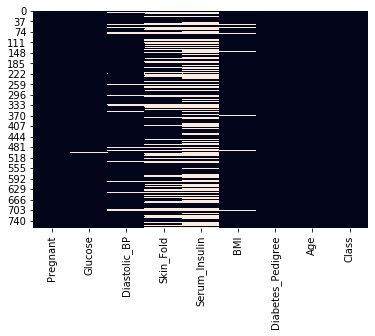

In [191]:
sns.heatmap(diabetes.isnull(), cbar=False)
plt.show()

[missingno GitHub](https://github.com/ResidentMario/missingno)

> Namestimo missingno: `conda install -c conda-forge missingno `

In [ ]:
# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

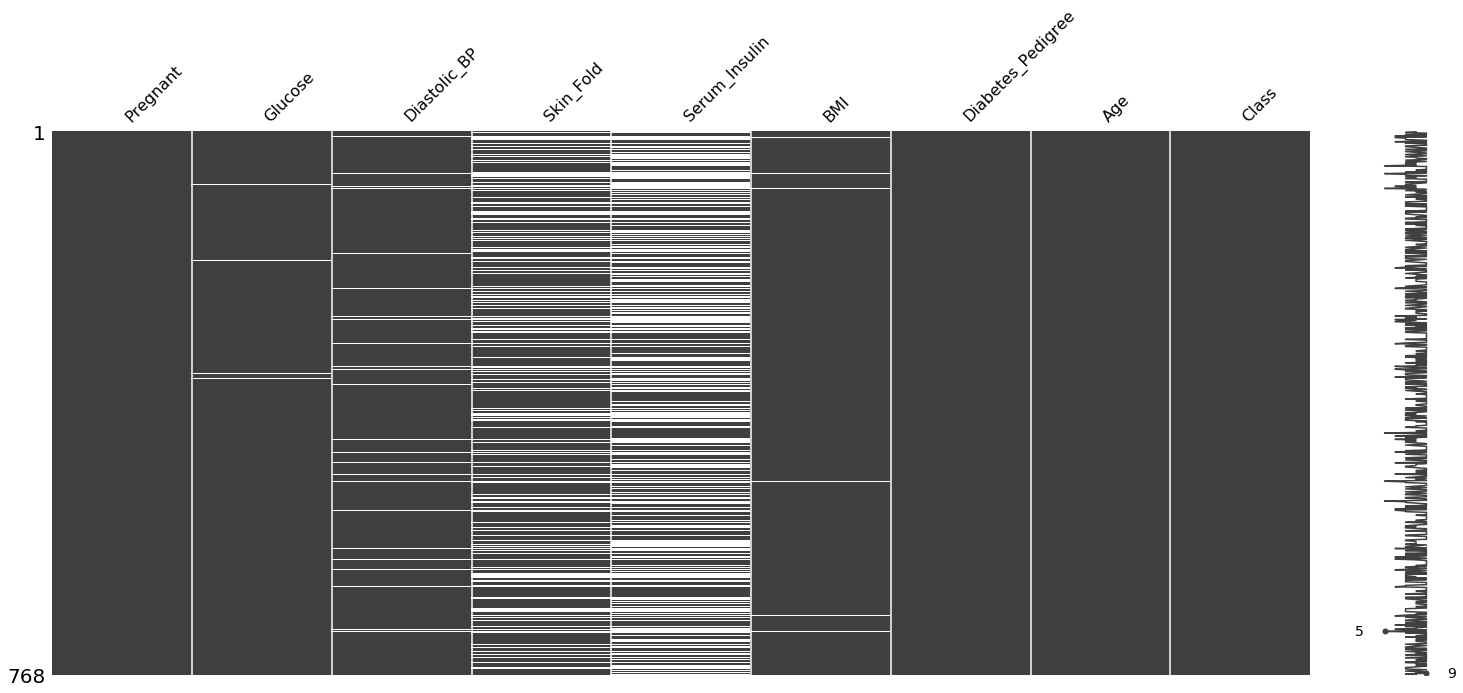

In [192]:
msno.matrix(diabetes)
plt.show()

#z belo so označene manjkajoče vrednosti

In [ ]:
#kaj ugotovimo iz grafa:
#bolj podrobno pogledamo te dva stolpca, ki imata veliko manjkajočih vrednosti

### Missingness Patterns

[]

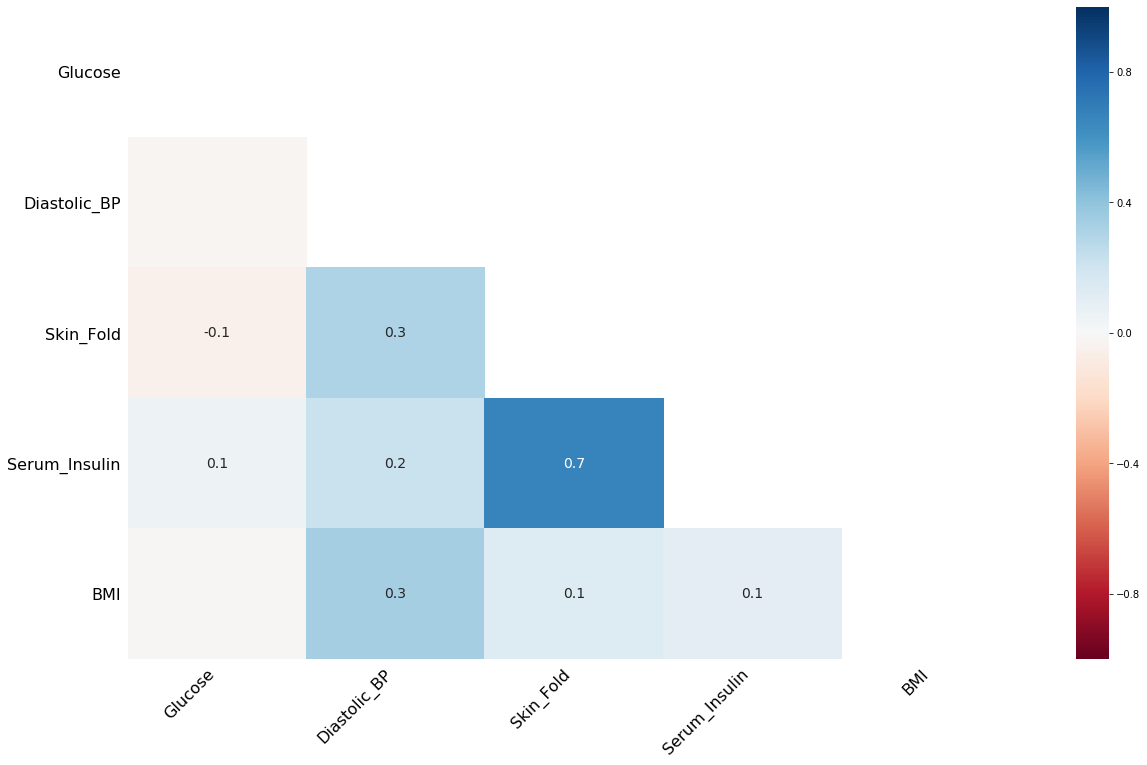

In [194]:
#pogledamo korealacijo med vrednostmi
msno.heatmap(diabetes)
plt.plot()

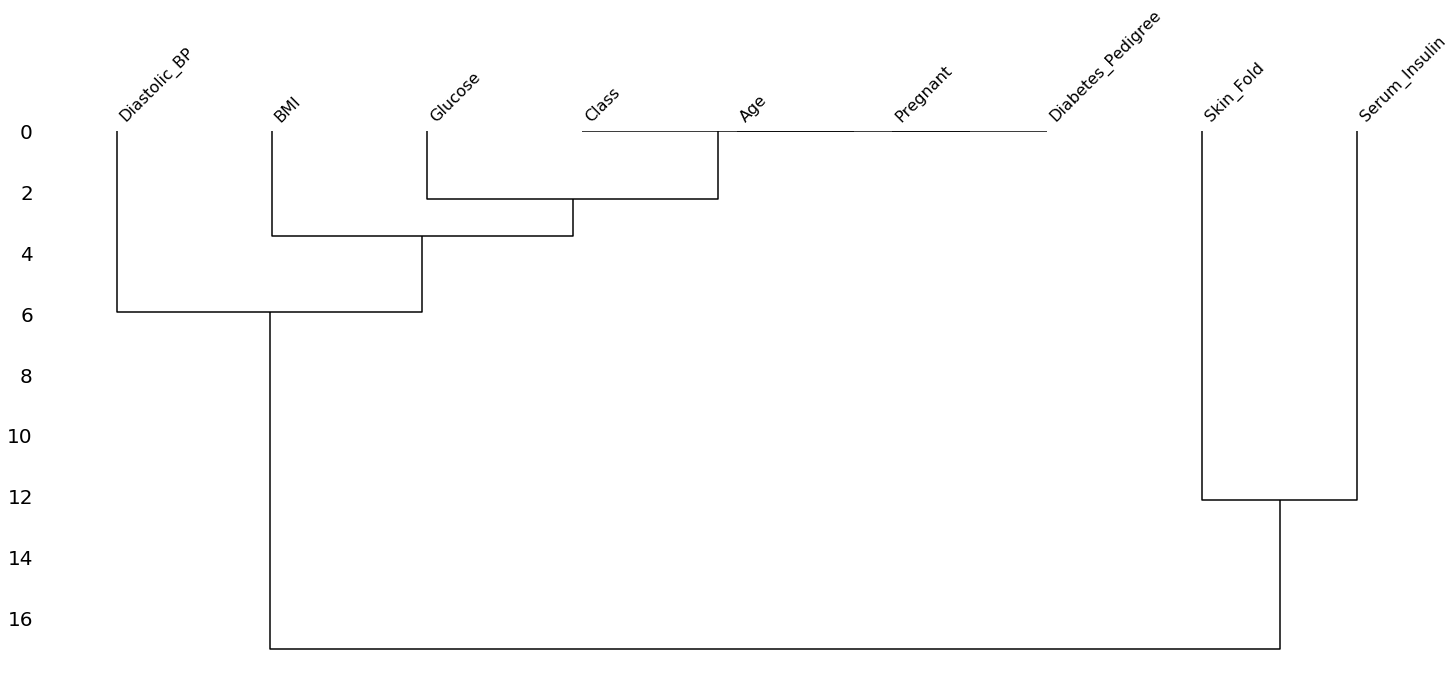

In [195]:
#dendrogram: še en način, da pogledamo, kako se vrednosti med sabo povezujejo
msno.dendrogram(diabetes)
plt.show()

In [ ]:
#zgornje 4 nimajo manjkajočih vrednosti
#na desni strani imamo 2 stolpca, ki sta čisto posebej (Skin_Fold in Serum_insulin), nista veliko povezana z ostalimi stolpci

In [196]:
sorted_values = diabetes.sort_values('Serum_Insulin')

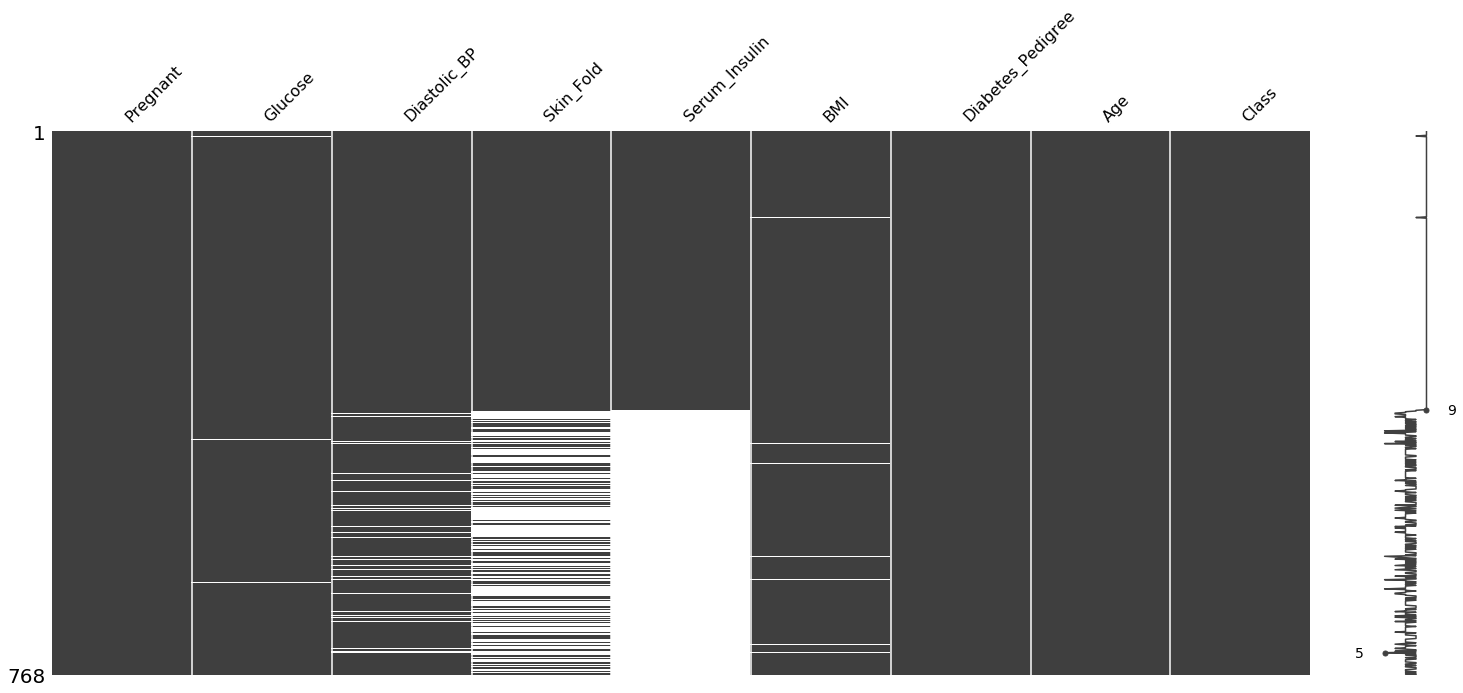

In [197]:


# Visualize the missingness summary of sorted
msno.matrix(sorted_values)

# Display nullity matrix
plt.show()

In [198]:
sorted_values.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Handle Missing Values

In [ ]:
#kako popravimo manjkajoče vrstice

#### Dropping Rows

In [199]:
#1. način je, da odvržemo tiste vrstice ki vsebiujejo manjkajoče vrstice
#zbrišemo vse vrstice,ki imajo Glucoze manjkaoče
diabetes.dropna(subset=['Glucose'], how = 'all', inplace = True)

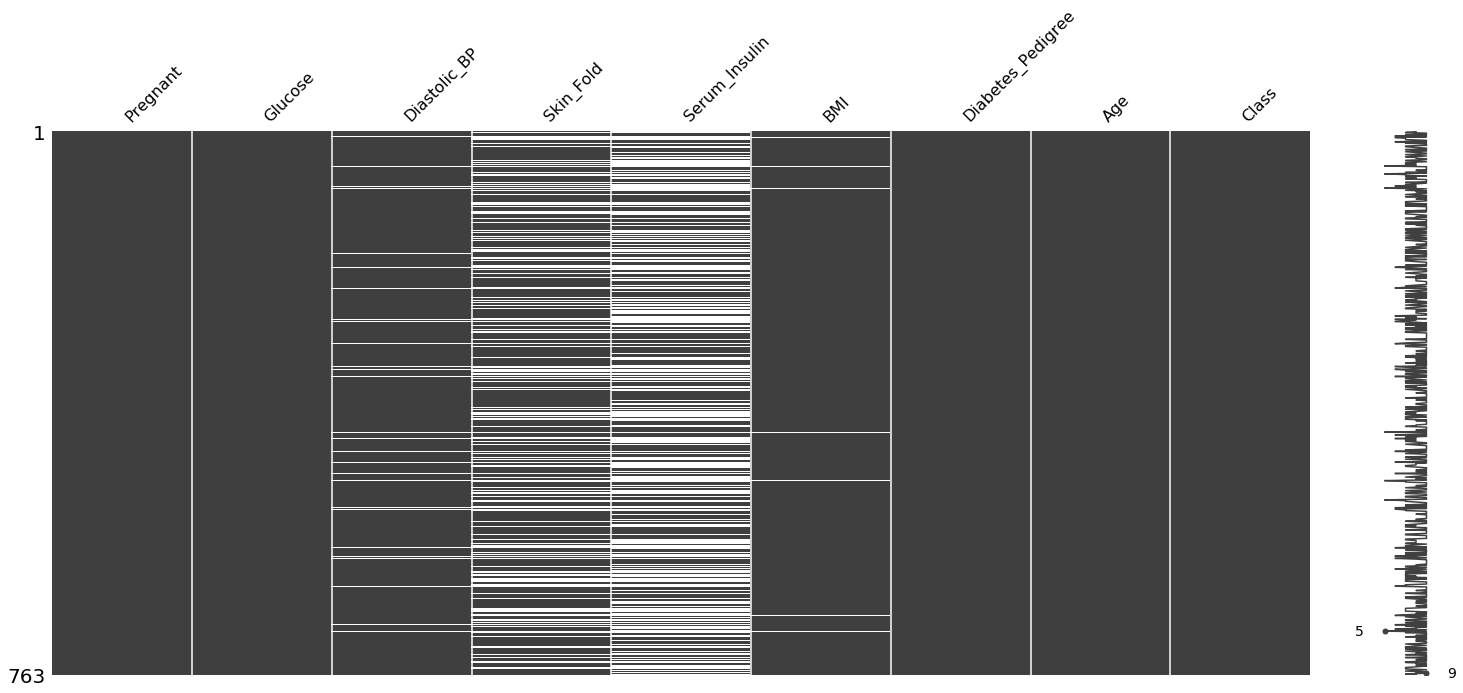

In [200]:
# Visualize the missingness of diabetes after-dropping missing values
msno.matrix(diabetes)
plt.show()

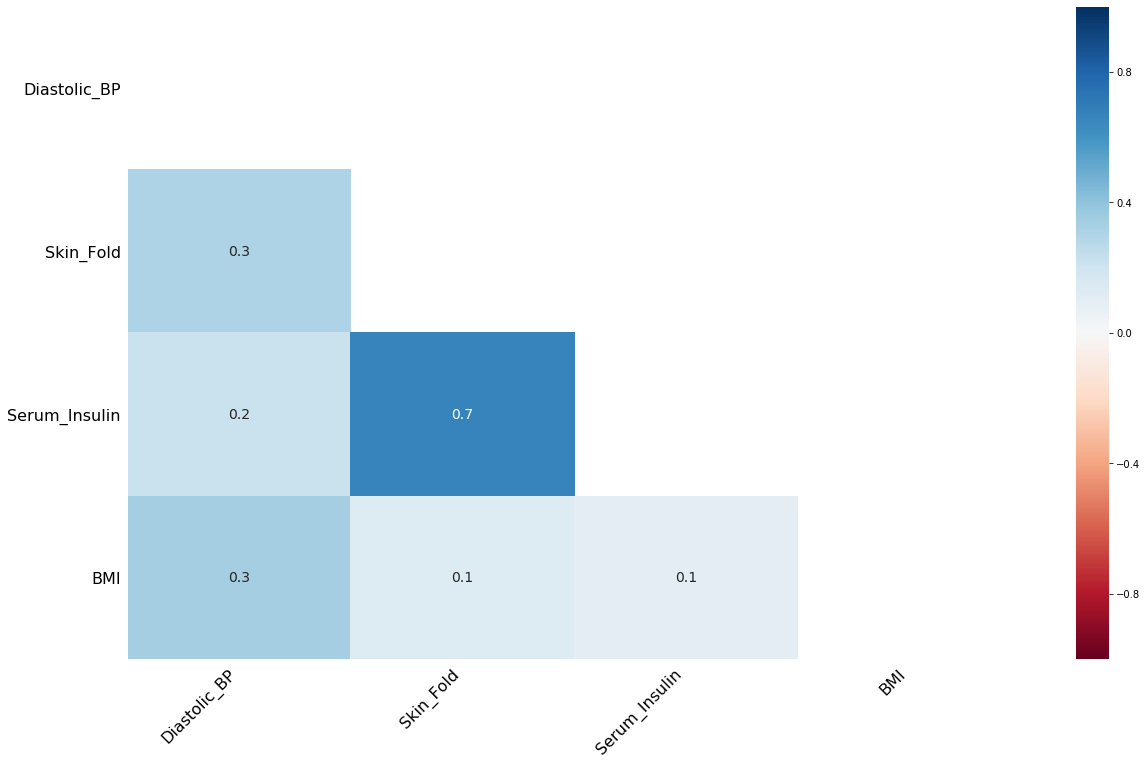

In [201]:
# Visualize the correlation of missingness between variables
msno.heatmap(diabetes)

# Show heatmap
plt.show()

In [202]:
#isto naredimo še za BMI
diabetes.dropna(subset=['BMI'], how = 'all', inplace = True)

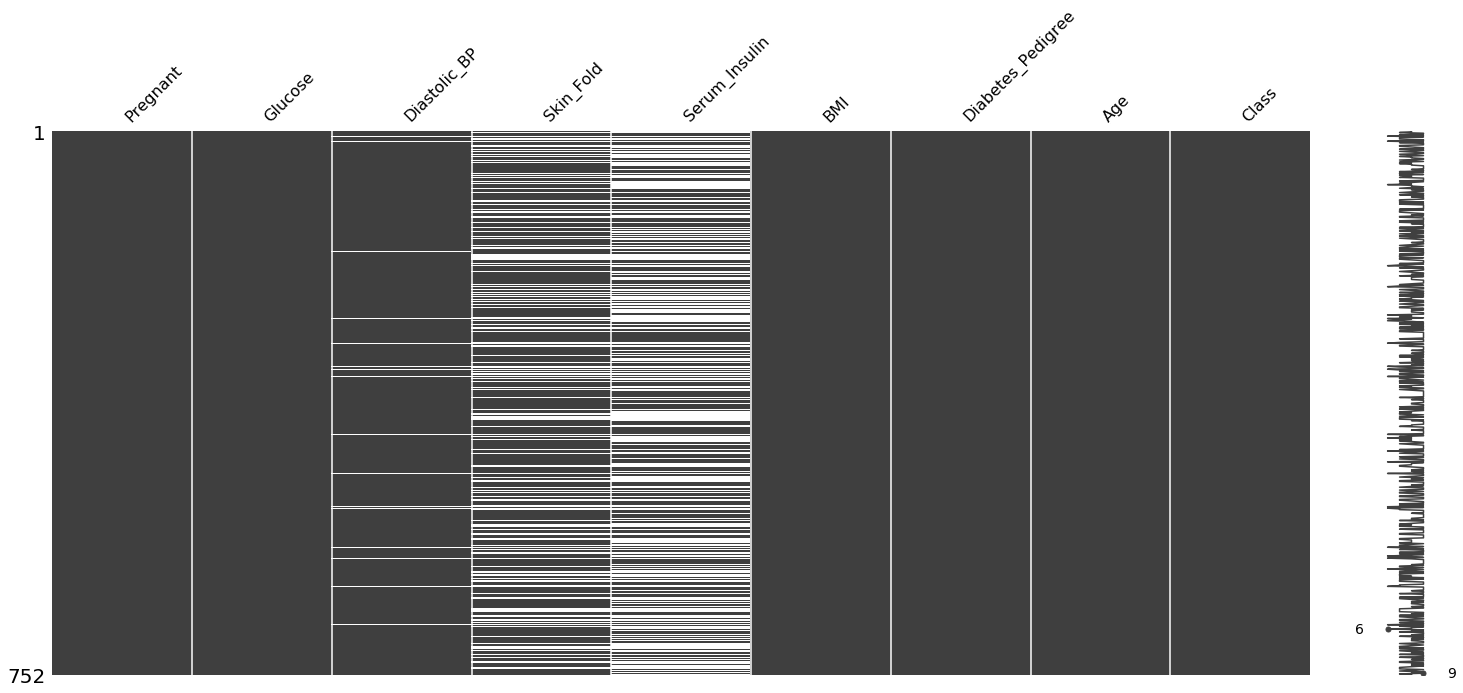

In [203]:
# Visualize the missingness in the data
msno.matrix(diabetes)
plt.show()

#### Imputation Techniques

##### Mean & median imputation


In [204]:
#manjkajoče vrednosti lahko tudi prepšemo s kakšno drugo vrednostjo (inputiramo)

from sklearn.impute import SimpleImputer

In [216]:
diabetes_mean =  diabetes.copy(deep = True)

In [207]:
mean_inputer = SimpleImputer(strategy = 'mean')

In [217]:
#vse manjkajoče vrednosti prepišemo s povprečno vrednostjo
diabetes_mean.iloc[:,:] = mean_inputer.fit_transform(diabetes_mean)

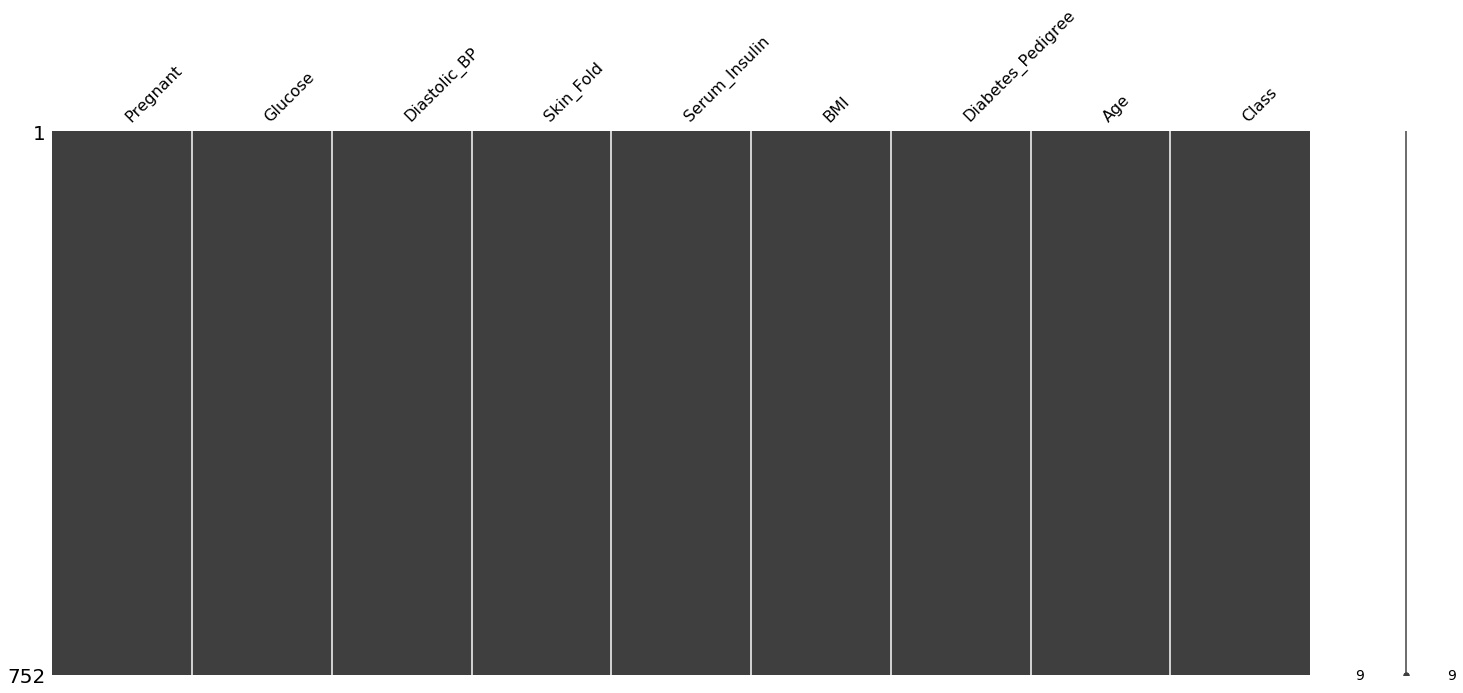

In [218]:
# Visualize the missingness in the data
msno.matrix(diabetes_mean)
plt.show()

In [219]:
# Make a copy of diabetes
diabetes_median = diabetes.copy(deep=True)

# Create median imputer object
median_imputer = SimpleImputer(strategy='median')

# Impute median values in the DataFrame diabetes_median
diabetes_median.iloc[:, :] = median_imputer.fit_transform(diabetes_median)

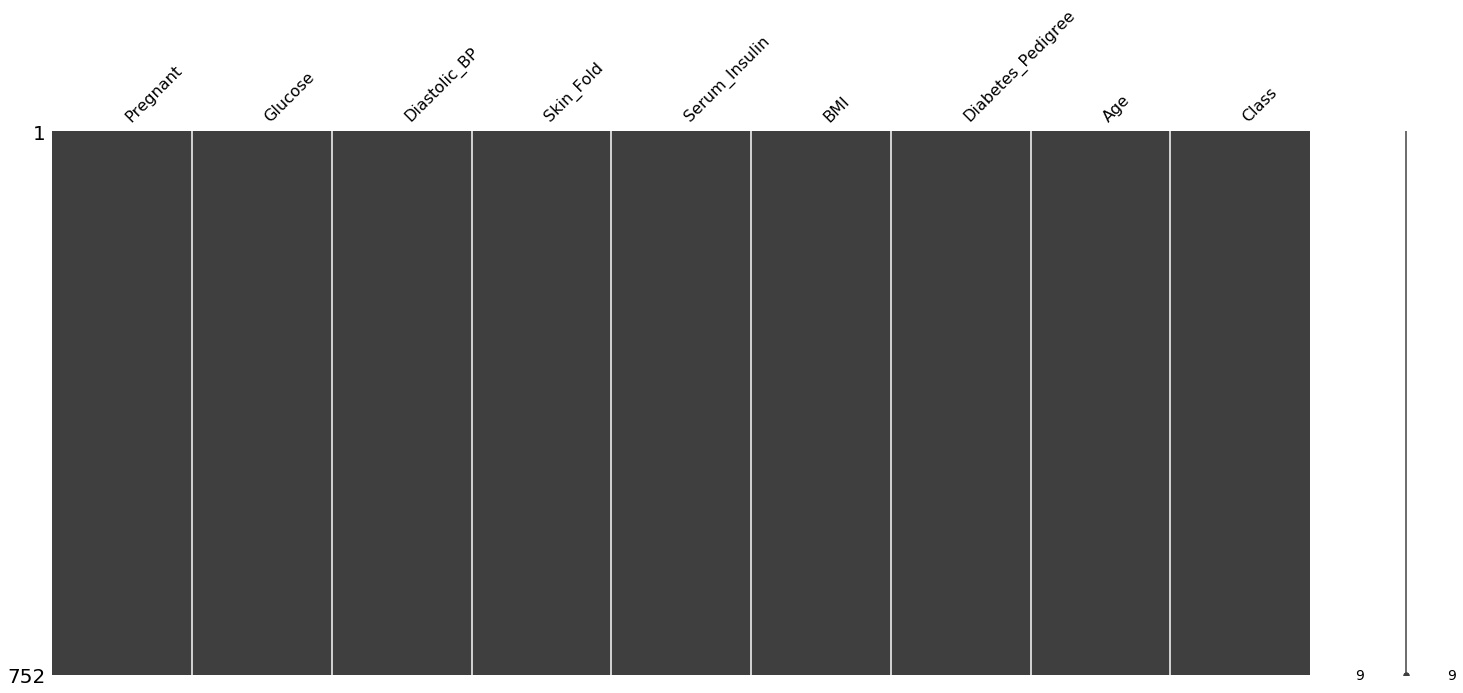

In [220]:
# Visualize the missingness in the data
msno.matrix(diabetes_median)
plt.show()

##### Mode and constant imputation

In [221]:
#vrednosti lahko inputiramo tudi z najbolj pogosto vrednostjo ali izbrano konstanto

# Make a copy of diabetes
diabetes_mode = diabetes.copy(deep=True)

# Create mode imputer object
mode_imputer = SimpleImputer(strategy='most_frequent')

# Impute using most frequent value in the DataFrame mode_imputer
diabetes_mode.iloc[:, :] = mode_imputer.fit_transform(diabetes_mode)

In [222]:
# Make a copy of diabetes
diabetes_constant = diabetes.copy(deep=True)

# Create median imputer object
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)

# Impute missing values to 0 in diabetes_constant
diabetes_constant.iloc[:, :] = constant_imputer.fit_transform(diabetes_constant)

##### Visualize imputations

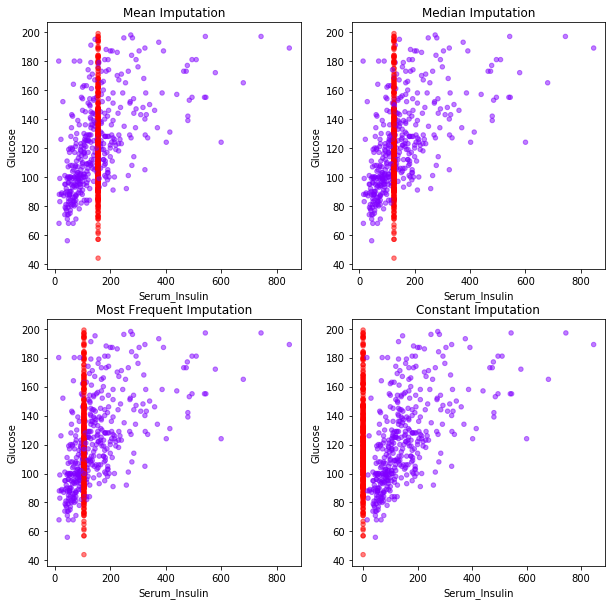

In [223]:
# Set nrows and ncols to 2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
nullity = diabetes.Serum_Insulin.isnull() | diabetes.Glucose.isnull()

# Create a dictionary of imputations
imputations = {'Mean Imputation': diabetes_mean, 'Median Imputation': diabetes_median, 
               'Most Frequent Imputation': diabetes_mode, 'Constant Imputation': diabetes_constant}

# Loop over flattened axes and imputations
for ax, df_key in zip(axes.flatten(), imputations):
    # Select and also set the title for a DataFrame
    imputations[df_key].plot(x='Serum_Insulin', y='Glucose', kind='scatter', 
                          alpha=0.5, c=nullity, cmap='rainbow', ax=ax, 
                          colorbar=False, title=df_key)
plt.show()

#### Dropping Columns

Predpriprava skupnega dataseta:

In [224]:
# In the next exercise, we'll update the column names to make them uniform and combine the dataframes again.

happiness2017.columns = happiness2017.columns.str.replace('.', ' ') \
                    .str.replace('\s+', ' ') \
                    .str.strip() \
                    .str.upper()

happiness2016.columns = happiness2016.columns.str.replace('.', ' ') \
                    .str.replace(r'[\(\)]', '') \
                    .str.strip() \
                    .str.upper()

happiness2015.columns = happiness2015.columns.str.replace('.', ' ') \
                    .str.replace(r'[\(\)]', '') \
                    .str.strip() \
                    .str.upper()

In [225]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True, sort=True)

In [226]:
combined.isnull().sum()

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
LOWER CONFIDENCE INTERVAL      335
REGION                         177
STANDARD ERROR                 334
TRUST GOVERNMENT CORRUPTION     22
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
YEAR                             0
dtype: int64

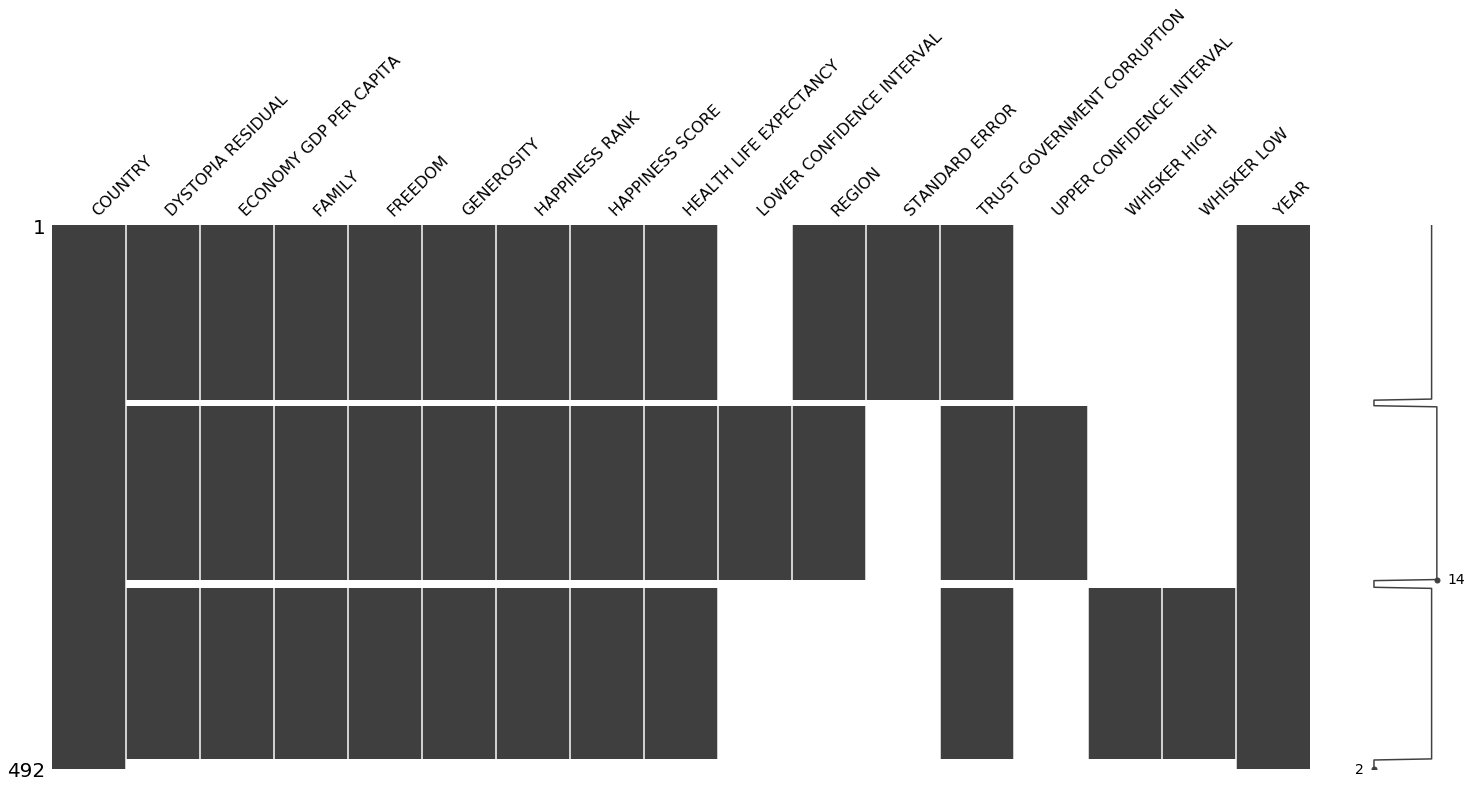

In [227]:
msno.matrix(combined)
plt.show()

In [228]:
#zbrišemo stolpce, ki imajo veliko manjkajočih vrednosti
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 
                   'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 
                   'WHISKER LOW']

In [229]:
combine_dropped = combined.drop(columns= columns_to_drop, axis = 1)

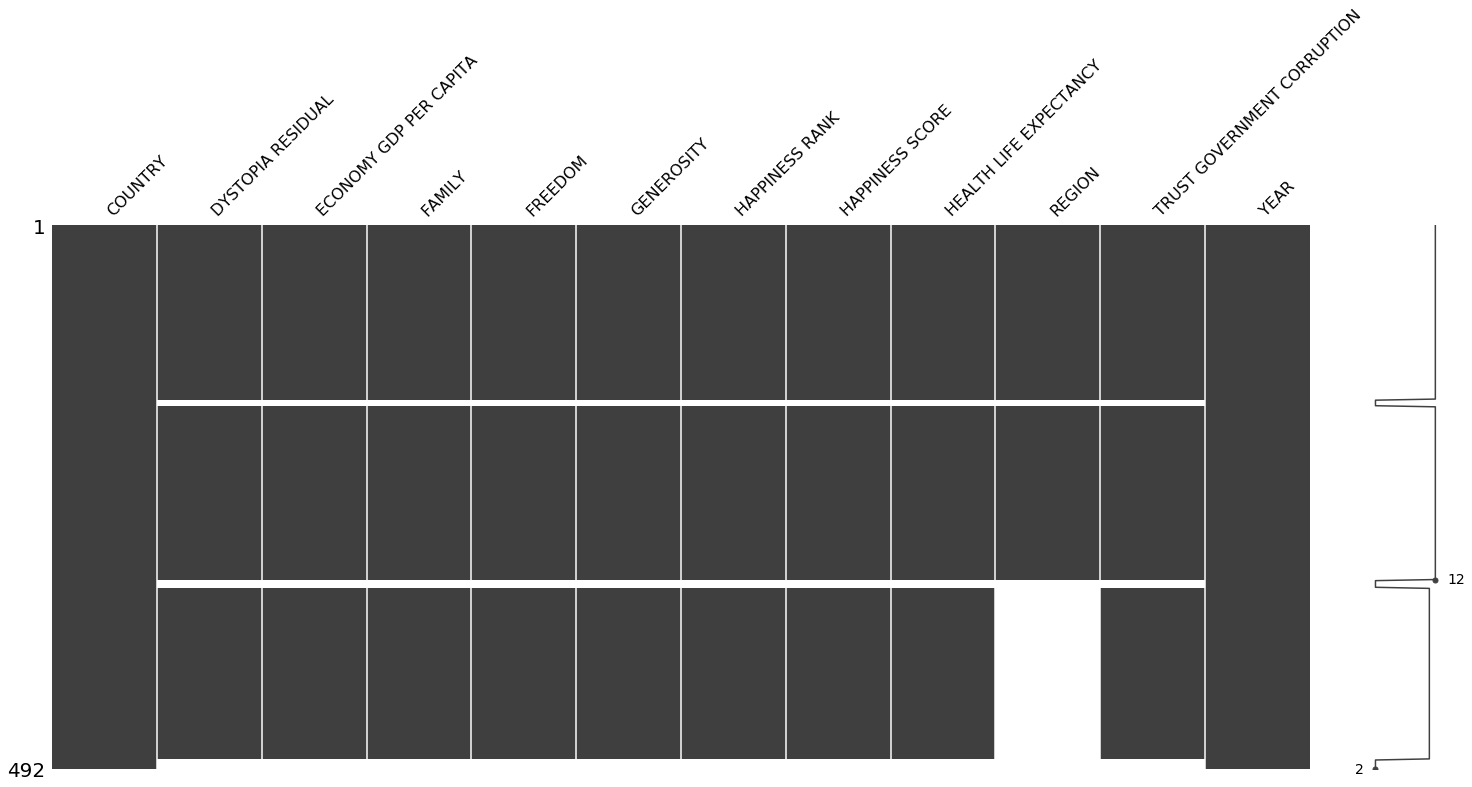

In [231]:
msno.matrix(combine_dropped)
plt.show()

In [233]:
#lahko avtomatiziramo, katere stolpce hočemo vržt ven
combined.notnull().sum().sort_values()

WHISKER LOW                    155
WHISKER HIGH                   155
LOWER CONFIDENCE INTERVAL      157
UPPER CONFIDENCE INTERVAL      157
STANDARD ERROR                 158
REGION                         315
HEALTH LIFE EXPECTANCY         470
DYSTOPIA RESIDUAL              470
ECONOMY GDP PER CAPITA         470
FAMILY                         470
FREEDOM                        470
GENEROSITY                     470
HAPPINESS RANK                 470
HAPPINESS SCORE                470
TRUST GOVERNMENT CORRUPTION    470
COUNTRY                        492
YEAR                           492
dtype: int64

In [234]:
#vržemo ven vse vrednosti, ki so pod 158 (thersh)
combined_dropped = combine_dropped.dropna(thresh = 159, axis = 1).copy()

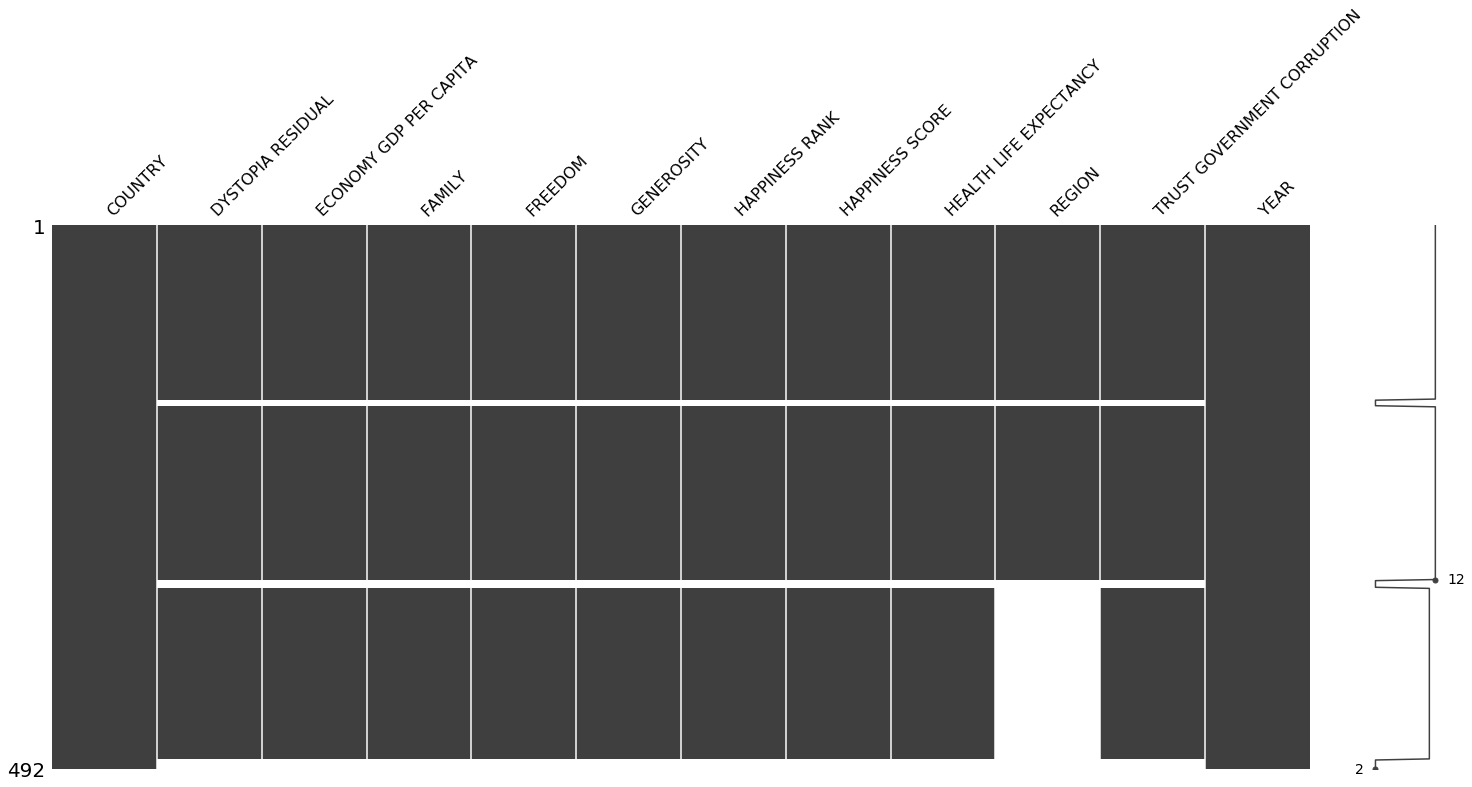

In [236]:
msno.matrix(combined_dropped)
plt.show()

#### Using Data From Additional Sources to Fill in Missing Values

In [237]:
#manjkajoče vrednosti lahko dopolnemo s podatki iz drugega vira (ali pa iz istega daataseta)
#nam recimo manjka Region v 2017 - te manjkajoče vrednosti lahko dopolnemo s podatki iz 2015 in 2016

In [ ]:
region_nan = combine_dropped['REGION'].isnull()

In [238]:
combine_dropped[region_nan]['YEAR'].value_counts()


2017    164
2016      7
2015      6
Name: YEAR, dtype: int64

In [239]:
#manjkajoči podatki za region za 2017
combine_dropped.loc[combine_dropped['YEAR'] == 2017, :].head()

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,REGION,TRUST GOVERNMENT CORRUPTION,YEAR
328,Norway,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,NaN,0.315964,2017
329,Denmark,2.313707,1.482383,1.551122,0.626007,0.355280,2,7.522,0.792566,NaN,0.400770,2017
330,Iceland,2.322715,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,NaN,0.153527,2017
331,Switzerland,2.276716,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,NaN,0.367007,2017
332,Finland,2.430182,1.443572,1.540247,0.617951,0.245483,5,7.469,0.809158,NaN,0.382612,2017


In [240]:
#vzamemo country in region iz 2016 in 2015
regions2015 = happiness2015[['COUNTRY', 'REGION']].copy()
regions2016 = happiness2016[['COUNTRY', 'REGION']].copy()

In [241]:
regions = pd.concat([regions2015, regions2016], ignore_index=True)

In [242]:
regions.head()

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [246]:
#vržemo ven manjkajoče vrednosti in duplikate
regions.dropna(inplace = True)
regions.drop_duplicates(inplace = True)

In [247]:
regions.head()

,COUNTRY,REGION
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America


In [248]:
#mergamo regions z ostalim datasetom
combine_dropped= pd.merge(left = combine_dropped,
                         right = regions,
                         on= 'COUNTRY',
                         how = 'left')

In [250]:
combine_dropped.isnull().sum()

COUNTRY                          0
DYSTOPIA RESIDUAL               22
ECONOMY GDP PER CAPITA          22
FAMILY                          22
FREEDOM                         22
GENEROSITY                      22
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
HEALTH LIFE EXPECTANCY          22
REGION_x                       177
TRUST GOVERNMENT CORRUPTION     22
YEAR                             0
REGION_y                         0
dtype: int64

In [ ]:
#imamo regijo X in regijo Y: zbrišemo nekaj

In [251]:
combine_dropped = combine_dropped.drop('REGION_x', axis=1) 

In [252]:
combine_dropped.rename(columns = {'REGION_y':'REGION'}, inplace=True)

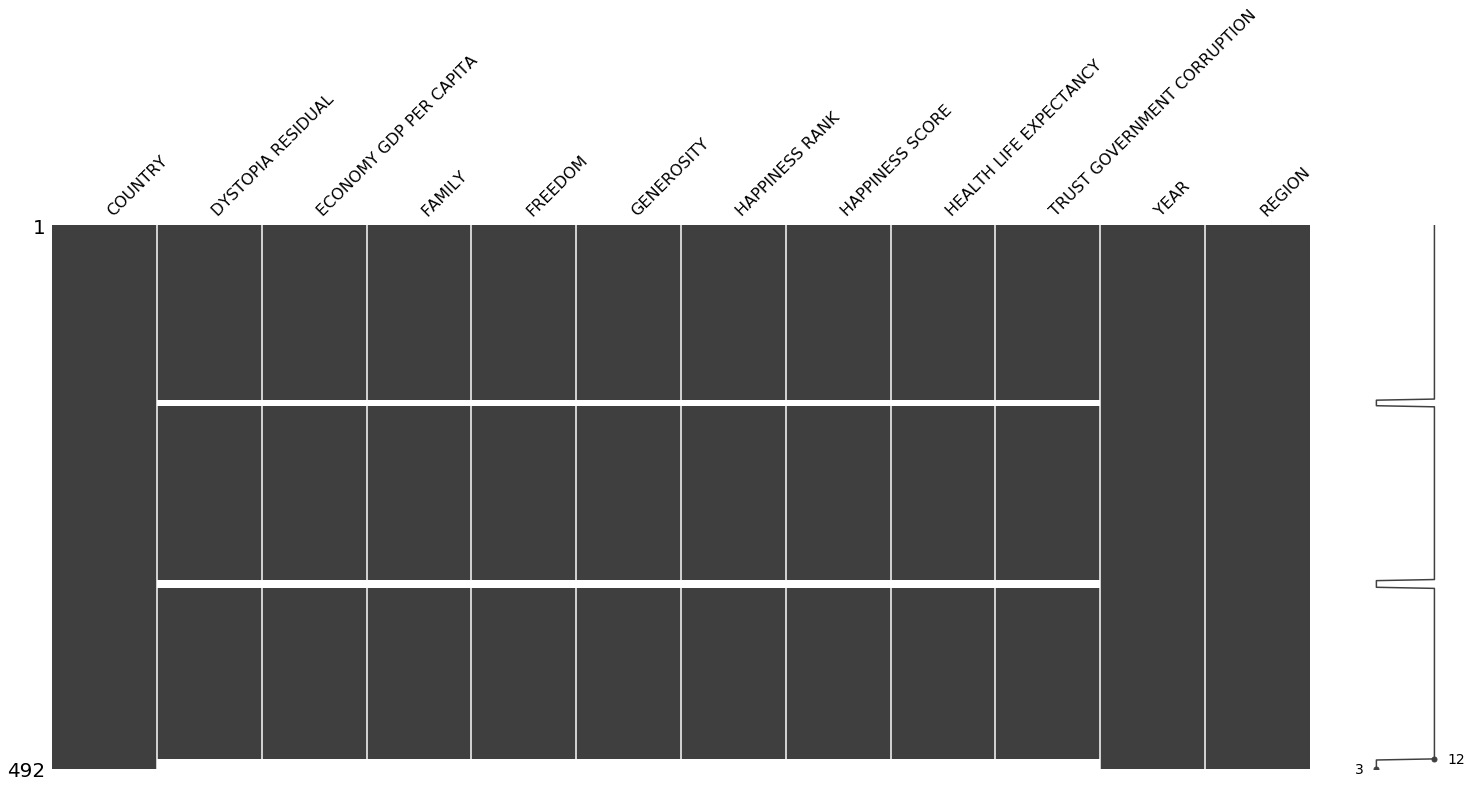

In [254]:
msno.matrix(combine_dropped)
plt.show()

#### Removing all missing values from World Happiness Reports datasets

In [256]:
dups = combine_dropped.duplicated(['COUNTRY', 'YEAR'])

In [257]:
combine_dropped[dups]
#zgleda kot da nimamo dupliciranih vrednosti

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,TRUST GOVERNMENT CORRUPTION,YEAR,REGION


In [258]:
#imena držav imamo nekje z malimi in nekje z velikimi črkami - tega ne zazna kot duplicirane vrednosti
#vse spremenimo v velike črke
combine_dropped['COUNTRY'] = combine_dropped['COUNTRY'].str.upper()

In [261]:
dups = combine_dropped.duplicated(['COUNTRY', 'YEAR'])
combine_dropped[dups]

#sedaj imamo duplicirane vrednosti

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,TRUST GOVERNMENT CORRUPTION,YEAR,REGION
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


In [262]:
combine_dropped[combine_dropped['COUNTRY'] == 'SOMALILAND REGION']


,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,TRUST GOVERNMENT CORRUPTION,YEAR,REGION
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


In [263]:
combine_dropped = combine_dropped.drop_duplicates(['COUNTRY', 'YEAR'])

In [266]:
combine_dropped[combine_dropped['COUNTRY'] == 'SOMALILAND REGION']

,COUNTRY,DYSTOPIA RESIDUAL,ECONOMY GDP PER CAPITA,FAMILY,FREEDOM,GENEROSITY,HAPPINESS RANK,HAPPINESS SCORE,HEALTH LIFE EXPECTANCY,TRUST GOVERNMENT CORRUPTION,YEAR,REGION
90,SOMALILAND REGION,2.11032,0.18847,0.95152,0.46582,0.50318,91.0,5.057,0.43873,0.39928,2015,Sub-Saharan Africa
260,SOMALILAND REGION,2.43801,0.25558,0.75862,0.39130,0.51479,97,5.057,0.33108,0.36794,2016,Sub-Saharan Africa
488,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,Sub-Saharan Africa


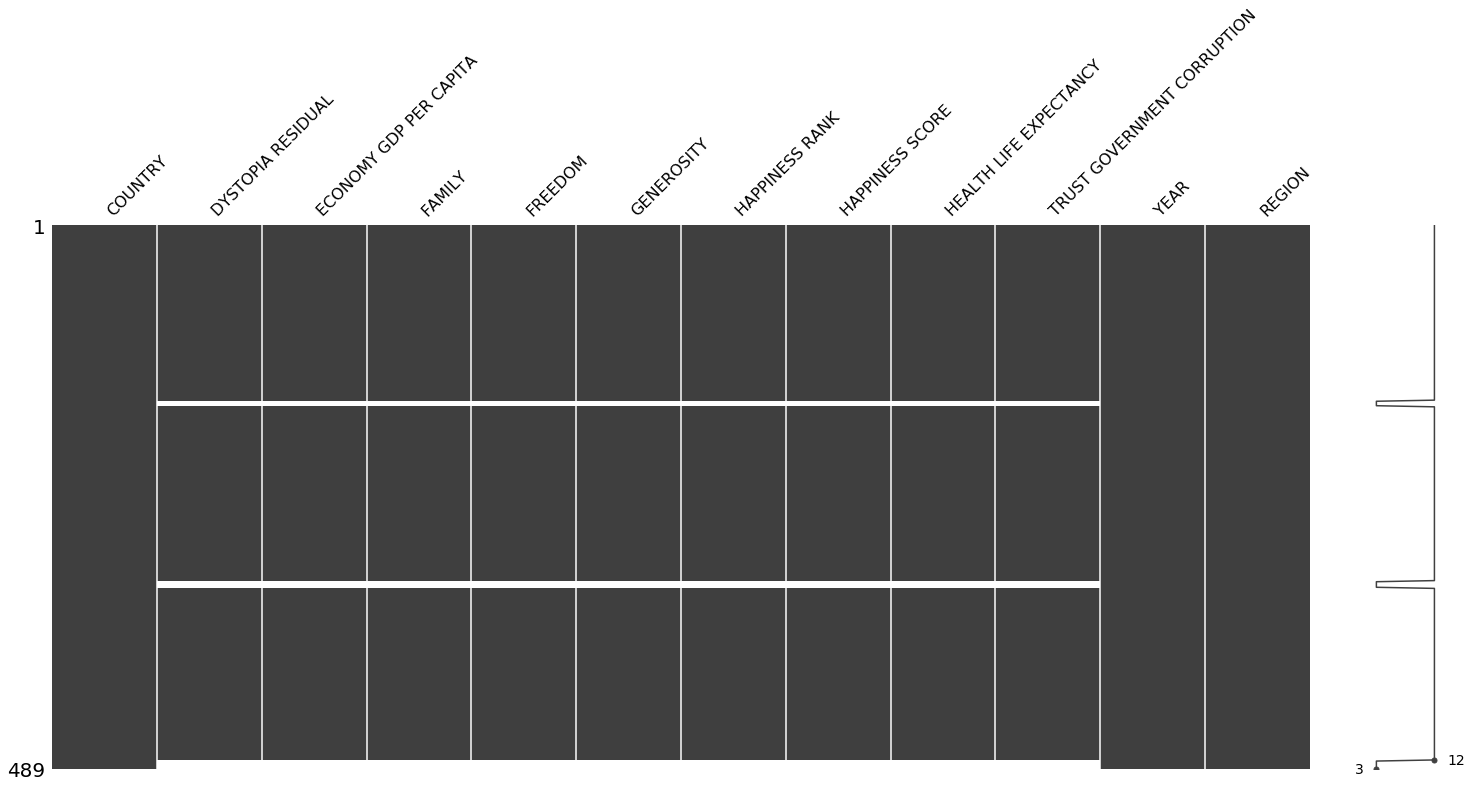

In [267]:
msno.matrix(combine_dropped)
plt.show()

In [269]:
combine_dropped.isnull().sum()

COUNTRY                         0
DYSTOPIA RESIDUAL              19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
FREEDOM                        19
GENEROSITY                     19
HAPPINESS RANK                 19
HAPPINESS SCORE                19
HEALTH LIFE EXPECTANCY         19
TRUST GOVERNMENT CORRUPTION    19
YEAR                            0
REGION                          0
dtype: int64

In [270]:
com_sorted = combine_dropped.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])

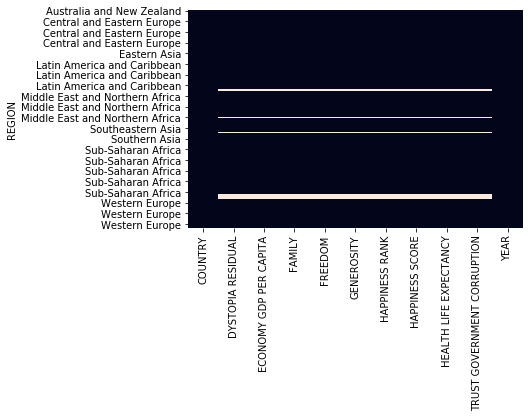

In [271]:
sns.heatmap(com_sorted.isnull(), cbar=False)
plt.show()

In [272]:
combine_dropped.isnull().sum()

COUNTRY                         0
DYSTOPIA RESIDUAL              19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
FREEDOM                        19
GENEROSITY                     19
HAPPINESS RANK                 19
HAPPINESS SCORE                19
HEALTH LIFE EXPECTANCY         19
TRUST GOVERNMENT CORRUPTION    19
YEAR                            0
REGION                          0
dtype: int64

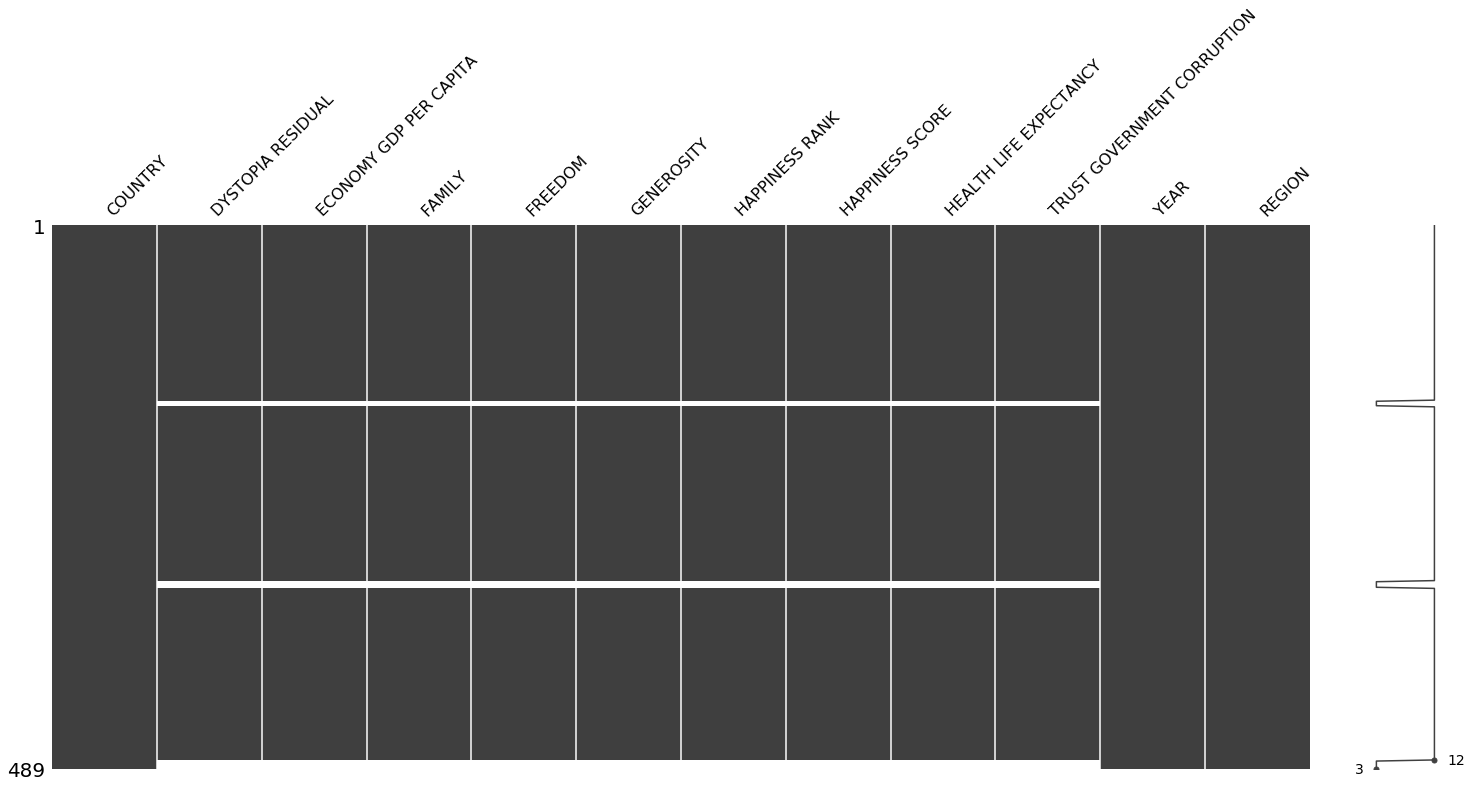

In [274]:
msno.matrix(combine_dropped)
plt.show()

In [278]:
combine_dropped.dropna(inplace = True)

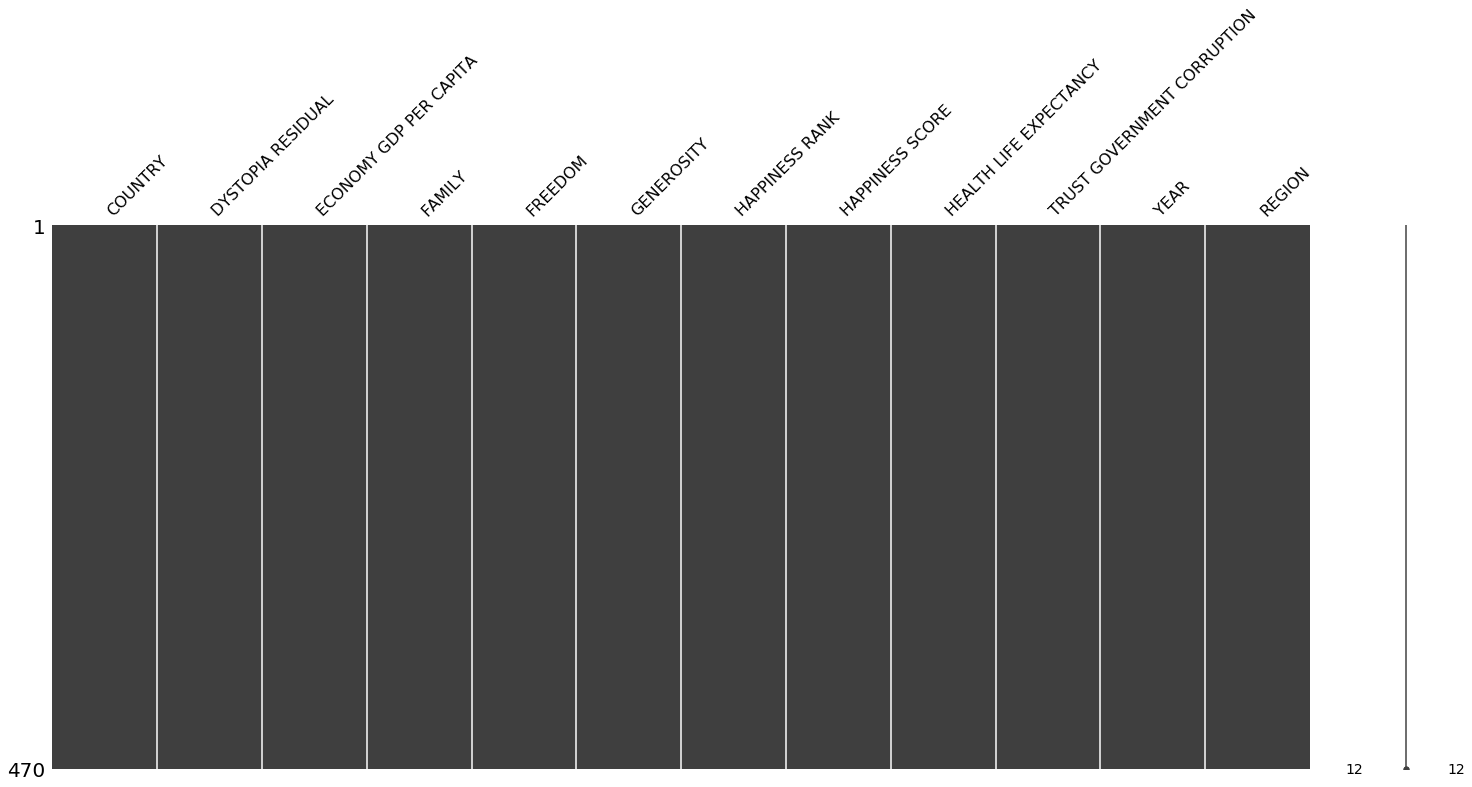

In [279]:
msno.matrix(combine_dropped)
plt.show()

In [282]:
combine_dropped.pivot_table(index = 'REGION',
                           values = 'HAPPINESS SCORE',
                           margins = True)
                           

,HAPPINESS SCORE
REGION,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.069074
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.150957


### Missing time-series data

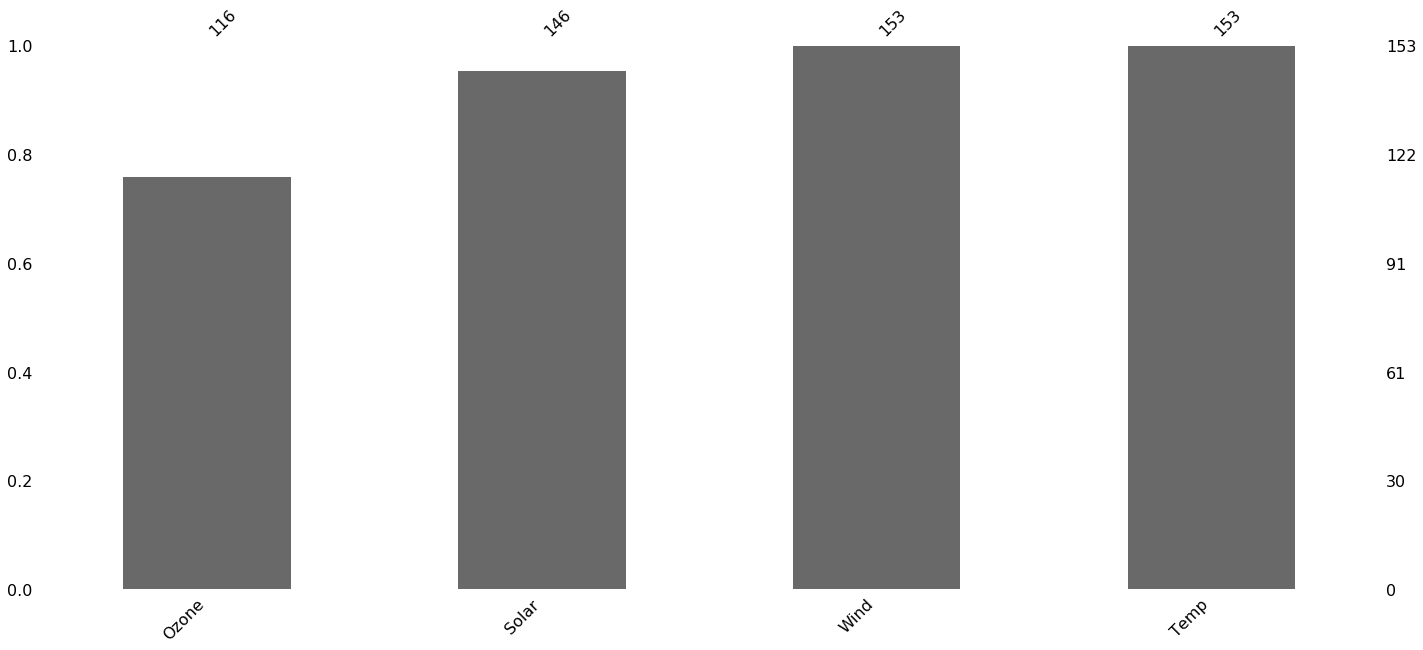

In [283]:
#kako rešujemo missing data v timeseries


# Plot amount of missingness
msno.bar(airquality)

# Display bar chart of missing values
plt.show()

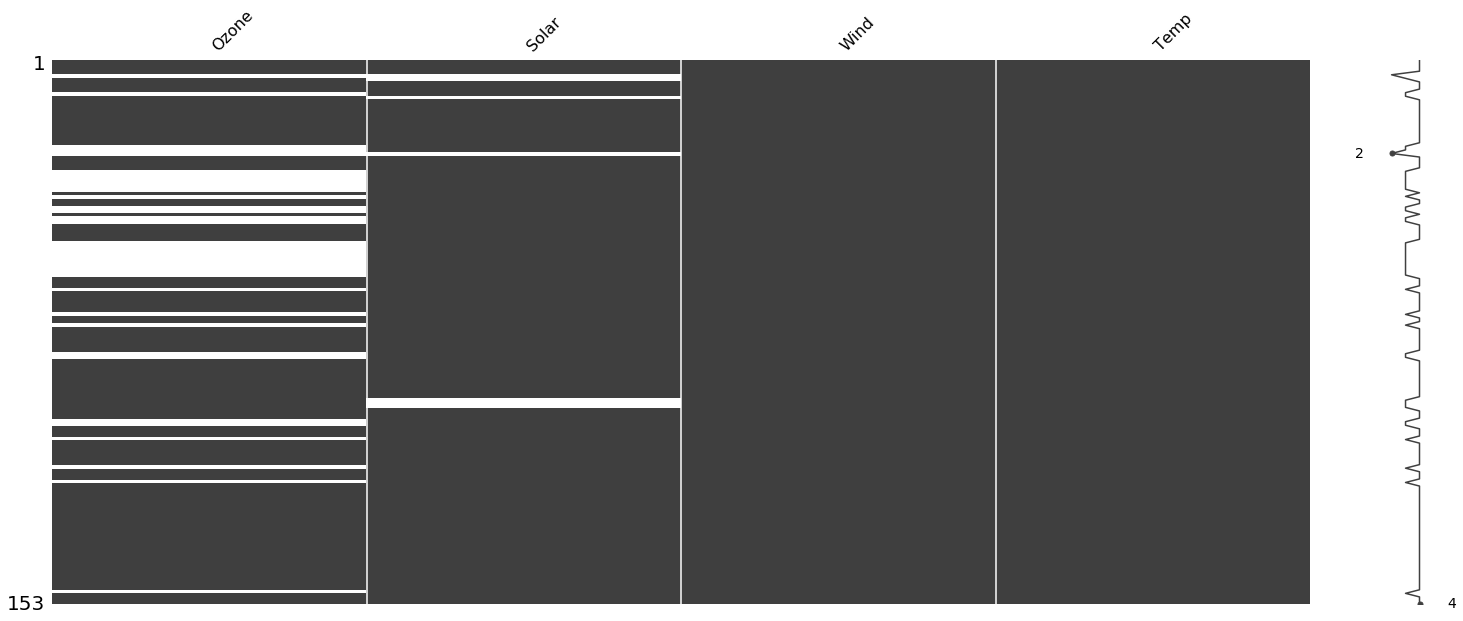

In [284]:
# Plot nullity matrix of airquality
msno.matrix(airquality)

# Display nullity matrix
plt.show()

In [ ]:
#imamo timeseries vrednosti - 

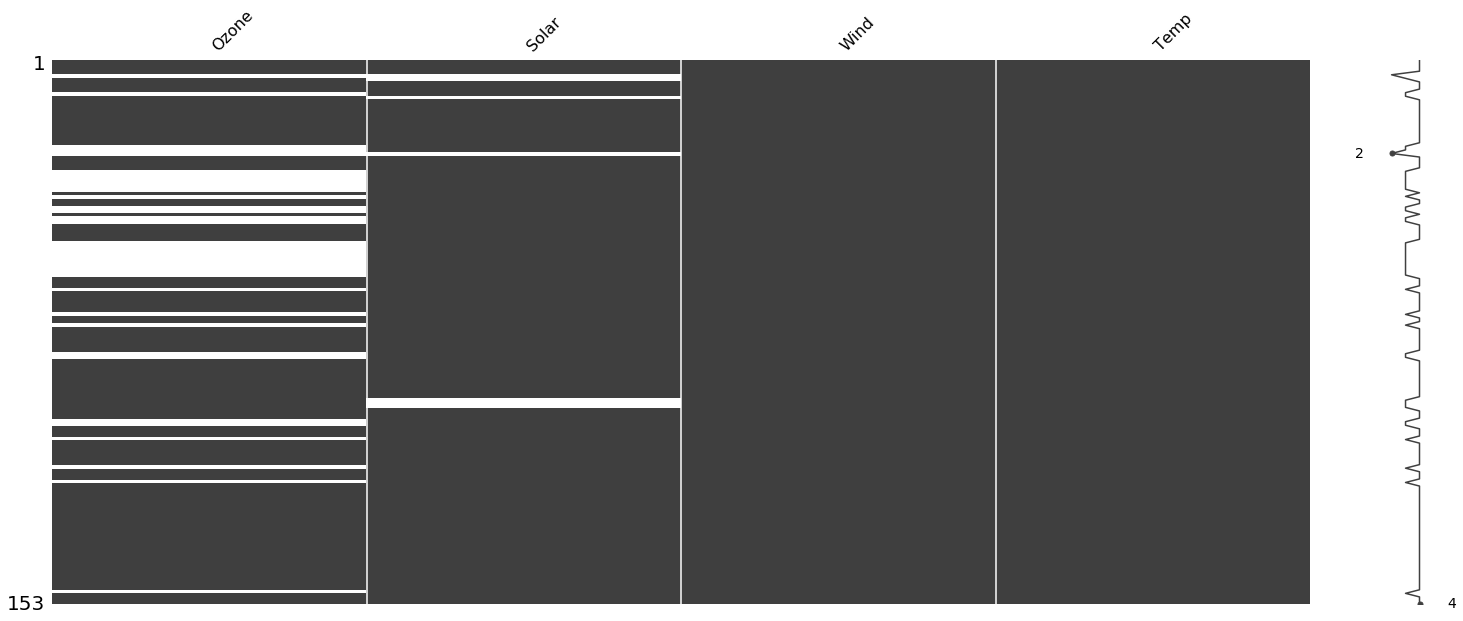

In [285]:
# Plot nullity matrix of airquality with frequency 'M'
msno.matrix(airquality, )

# Display nullity matrix
plt.show()

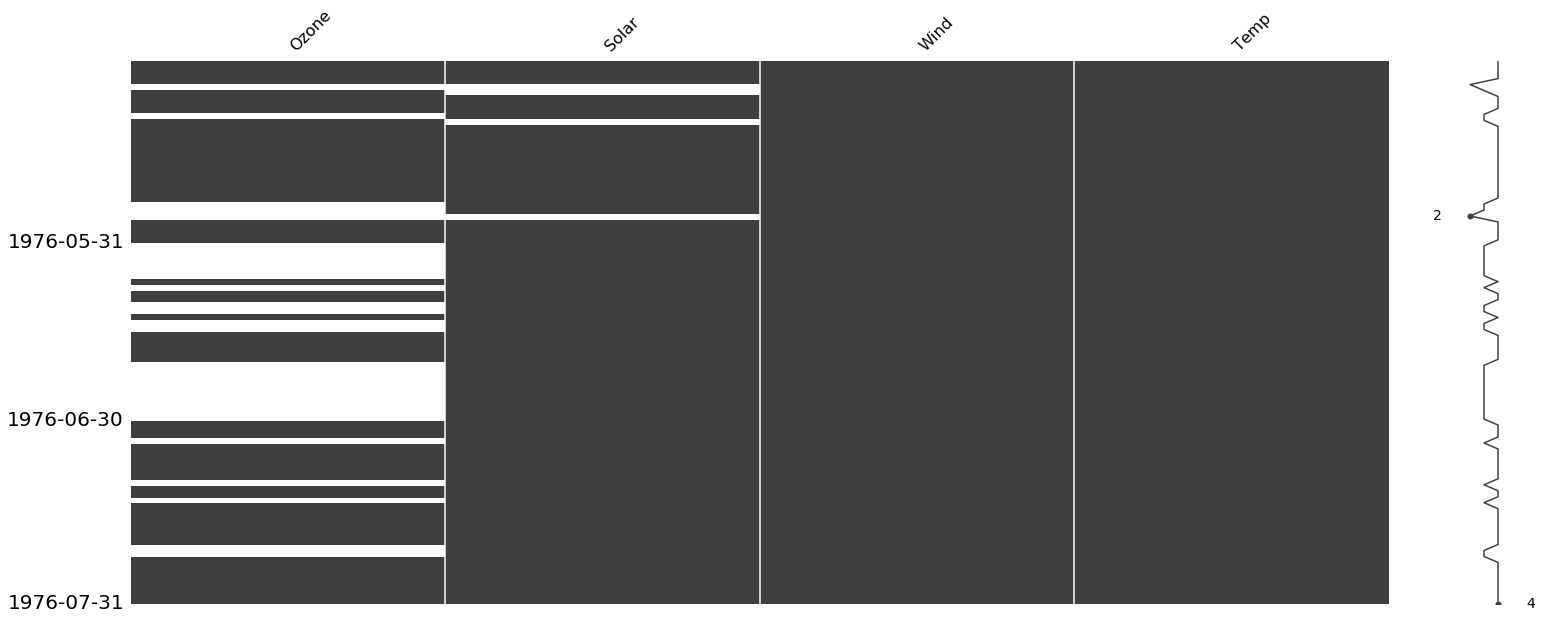

In [286]:
# Plot the sliced nullity matrix of airquality with frequency 'M'
msno.matrix(airquality.loc['May-1976':'Jul-1976'], freq='M')
plt.show()

#točno vidimo, za katere datume  nam manjkajo vrednosti

#### Impute with Forward-fill & Backfill 


In [287]:
airquality[30:40]

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-31,37.0,279.0,7.4,76
1976-06-01,NaN,286.0,8.6,78
1976-06-02,NaN,287.0,9.7,74
1976-06-03,NaN,242.0,16.1,67
1976-06-04,NaN,186.0,9.2,84
1976-06-05,NaN,220.0,8.6,85
1976-06-06,NaN,264.0,14.3,79
1976-06-07,29.0,127.0,9.7,82
1976-06-08,NaN,273.0,6.9,87


In [293]:
airquality.fillna(method = 'ffill', inplace = True)

In [294]:
airquality[30:40]

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-31,37.0,279.0,7.4,76
1976-06-01,37.0,286.0,8.6,78
1976-06-02,37.0,287.0,9.7,74
1976-06-03,37.0,242.0,16.1,67
1976-06-04,37.0,186.0,9.2,84
1976-06-05,37.0,220.0,8.6,85
1976-06-06,37.0,264.0,14.3,79
1976-06-07,29.0,127.0,9.7,82
1976-06-08,29.0,273.0,6.9,87


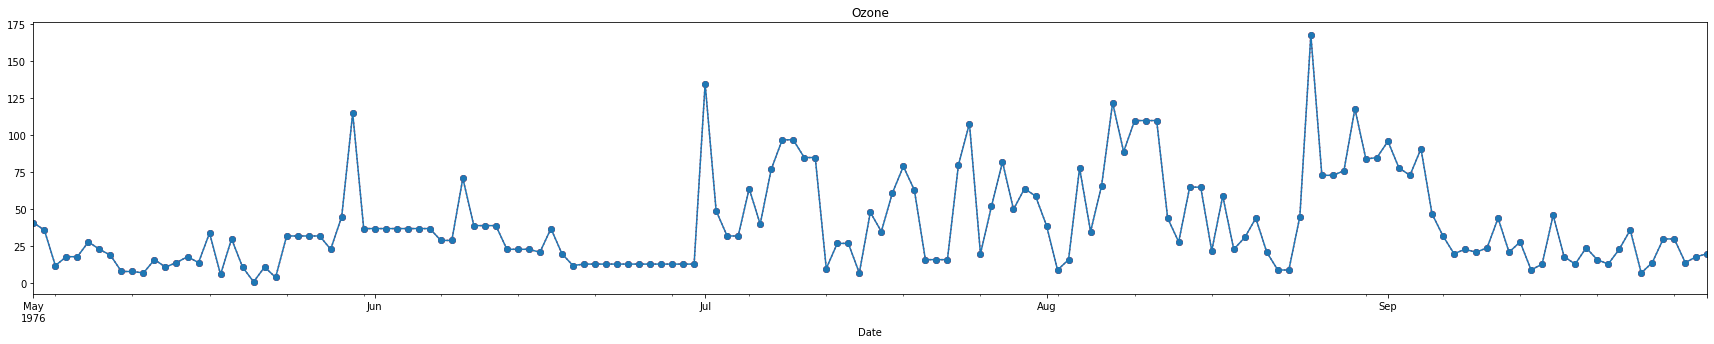

In [299]:
# Impute airquality DataFrame with ffill method
ffill_imputed = airquality.fillna(method = 'ffill')


# Plot the imputed DataFrame ffill_imp in red dotted style 
ffill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

In [300]:
# Print prior to imputing missing values
airquality[30:40]

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-31,37.0,279.0,7.4,76
1976-06-01,37.0,286.0,8.6,78
1976-06-02,37.0,287.0,9.7,74
1976-06-03,37.0,242.0,16.1,67
1976-06-04,37.0,186.0,9.2,84
1976-06-05,37.0,220.0,8.6,85
1976-06-06,37.0,264.0,14.3,79
1976-06-07,29.0,127.0,9.7,82
1976-06-08,29.0,273.0,6.9,87


In [301]:
# Fill NaNs using backward fill


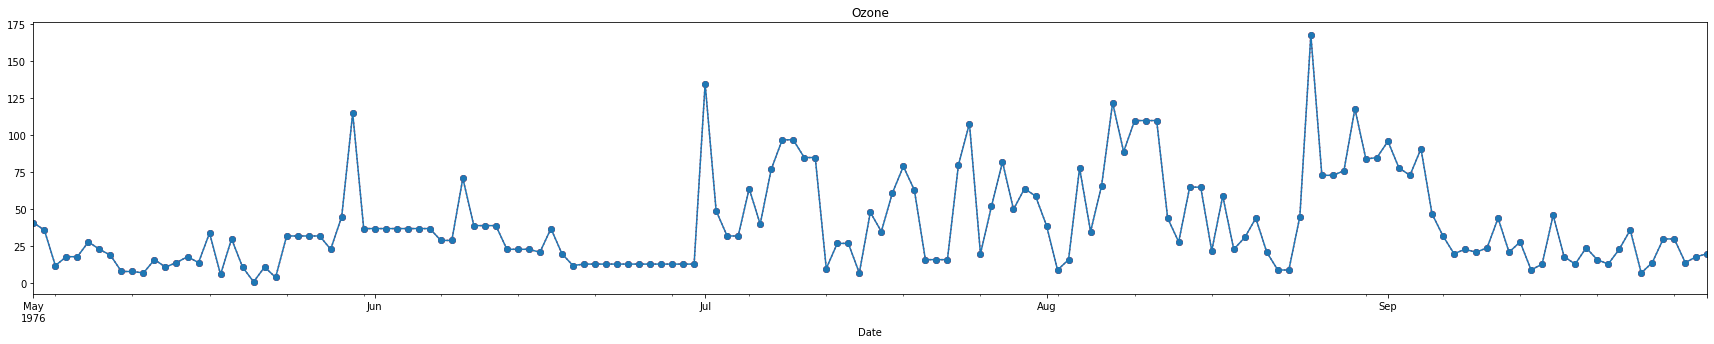

In [302]:
# Impute airquality DataFrame with bfill method
bfill_imputed = airquality.fillna(method='bfill')

# Plot the imputed DataFrame bfill_imp in red dotted style 
bfill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

#### Impute with interpolate method

In [ ]:
# Interpolate the NaNs linearly


In [303]:
# Interpolate the NaNs quadratically
airquality.interpolate(method='quadratic', inplace=False)[30:40]

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-31,37.0,279.0,7.4,76
1976-06-01,37.0,286.0,8.6,78
1976-06-02,37.0,287.0,9.7,74
1976-06-03,37.0,242.0,16.1,67
1976-06-04,37.0,186.0,9.2,84
1976-06-05,37.0,220.0,8.6,85
1976-06-06,37.0,264.0,14.3,79
1976-06-07,29.0,127.0,9.7,82
1976-06-08,29.0,273.0,6.9,87


In [304]:
# Interpolate the NaNs with nearest value
airquality.interpolate(method='nearest', inplace=False)[30:40]

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-31,37.0,279.0,7.4,76
1976-06-01,37.0,286.0,8.6,78
1976-06-02,37.0,287.0,9.7,74
1976-06-03,37.0,242.0,16.1,67
1976-06-04,37.0,186.0,9.2,84
1976-06-05,37.0,220.0,8.6,85
1976-06-06,37.0,264.0,14.3,79
1976-06-07,29.0,127.0,9.7,82
1976-06-08,29.0,273.0,6.9,87


In [305]:
linear = airquality.interpolate(method='linear')
quadratic = airquality.interpolate(method='quadratic')
nearest = airquality.interpolate(method='nearest')

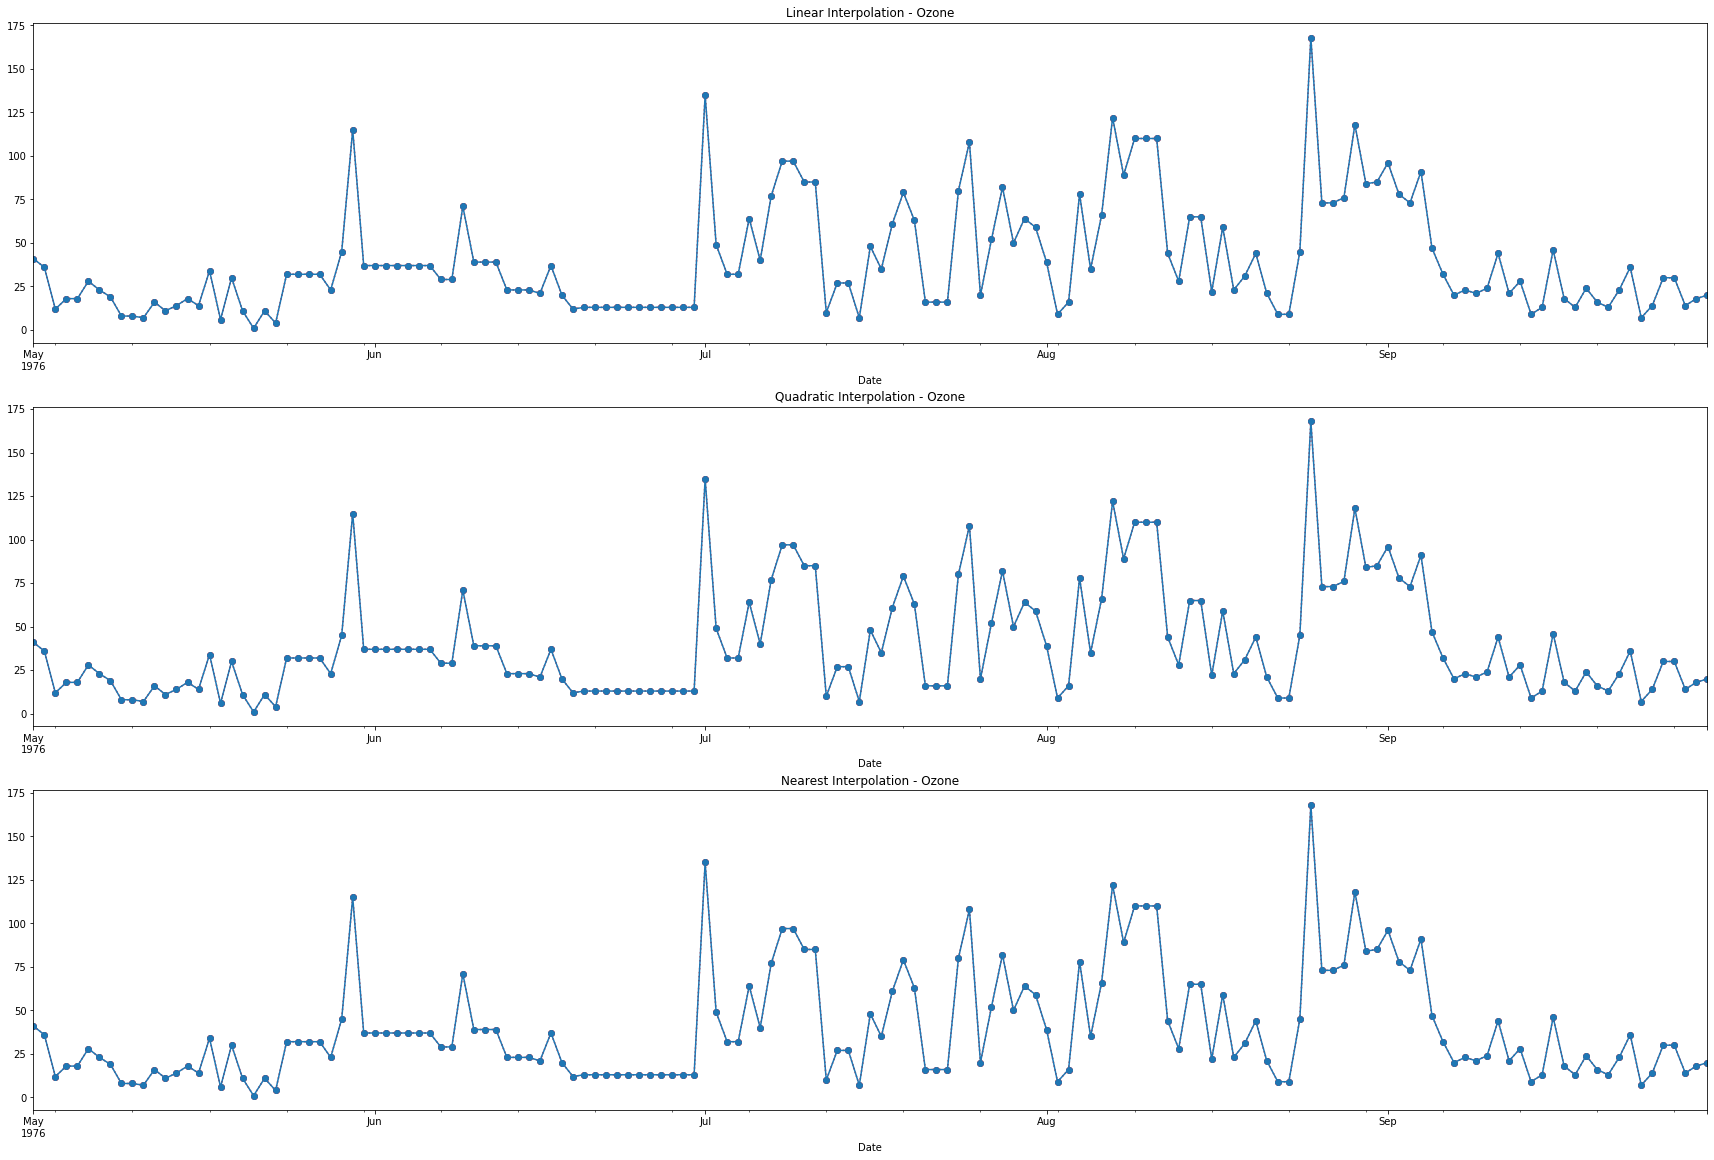

In [306]:
# Set nrows to 3 and ncols to 1
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 20))

# Create a dictionary of interpolations
interpolations = {'Linear Interpolation': linear, 
                  'Quadratic Interpolation': quadratic, 
                  'Nearest Interpolation': nearest}

# Loop over axes and interpolations
for ax, df_key in zip(axes, interpolations):
    # Select and also set the title for a DataFrame
    interpolations[df_key].Ozone.plot(color='red', 
                                      marker='o', 
                                      linestyle='dotted', ax=ax)
    
    airquality.Ozone.plot(title=df_key + ' - Ozone', marker='o', ax=ax)

plt.show()